# Analyzing Virginia's Economy from 2001 to 2018

### DATS 6103 - Fall 2020 - Joseph Valle 

## 1. Introduction 

As the US's economy continues to evolve with the rapid tide of globalization and interstate commerce, the opportunities for growth and development for businesses among a variety of sectors have likewise expanded notably over the last two decades. One state that has especially drawn attention as of late for its economic potence is Virginia, partly on account of its proximity to Washington, DC, as well as the nationwide shift toward more technological jobs.

This project will interpret the trends in population, income, and GDP by industry throughout Virginia from 2001 to 2018.  Rather than analyze Virginia as a whole, we can delve further and examine its individual geographic areas.  As a reference over the course of this project, a geographic area can be defined as a county or independent city within Virginia.  We do this in order to take into account the impact of geography on predominant industries.  Of course, we can also consider how the rise of an industry in a certain area can affect said area's population and income over time.

Our data can be found at the [Bureau of Economic Analysis](https://apps.bea.gov/regional/downloadzip.cfm), and downloaded and converted as CSV files with the help of Pandas.  After cleaning up our data to focus on the years 2001 through 2018, we will first look at trends in personal and per capita income in both absolute and relative figures.  Similarly, we will pivot toward population, and isolate the areas with the most significant absolute and relative shifts in this regard.  Finally, we will identify which industry constituted the greatest share of total GDP for each area over our time span of interest.  As an extension to this last point, we will expand our inquiry toward identifying what relationships, if any, there are between an area's most significant sector and its relative changes in personal income, per capita income, and population from 2001 to 2018.  Using this, we can identify if there any particular industries drawing more people toward certain areas, or are earning their residents more income, from a societal and individual perspective.

Any references that were helpful in completing this project are listed at the bottom of this Jupyter Notebook.

## 2. Installing Our Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
from numpy import array
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
pop_inc = pd.read_csv("pop_inc.csv")
ind_gdp = pd.read_csv("ind_gdp.csv")

#Respectively, our data sets consist of figures with regard to population and income, and GDP by industry.

In [3]:
pop_inc.head()

GeoFIPS        GeoName Region TableName  LineCode IndustryClassification  \
0  "00000"  United States           CAINC1       1.0                    ...   
1  "00000"  United States           CAINC1       2.0                    ...   
2  "00000"  United States           CAINC1       3.0                    ...   
3  "01000"        Alabama      5    CAINC1       1.0                    ...   
4  "01000"        Alabama      5    CAINC1       2.0                    ...   

                               Description                  Unit       1969  \
0   Personal income (thousands of dollars)  Thousands of dollars  791229000   
1                  Population (persons) 1/     Number of persons  201298000   
2  Per capita personal income (dollars) 2/               Dollars       3931   
3   Personal income (thousands of dollars)  Thousands of dollars    9737715   
4                  Population (persons) 1/     Number of persons    3440000   

        1970  ...         2009         2010         2011         2012  \
0  855525000  ...  12051307000  12541995000  13315478000  13998383000   
1  203798722  ...    306771529    309326085    311580009    313874218   
2       4198  ...        39284        40546        42735        44599   
3   10628318  ...    155145273    161516561    167942757    172804075   
4    3449846  ...      4757938      4785448      4798834      4815564   

          2013         2014         2015         2016         2017  \
0  14175503000  14982715000  15709242000  16111636000  16870106000   
1    316057727    318386421    320742673    323071342    325147121   
2        44851        47058        48978        49870        51885   
3    174415510    180457769    187544435    190814674    197283188   
4      4830460      4842481      4853160      4864745      4875120   

          2018  
0  17813035000  
1    327167434  
2        54446  
3    206455011  
4      4887871  

[5 rows x 58 columns]

In [4]:
ind_gdp.head()

GeoFIPS          GeoName Region TableName  LineCode IndustryClassification  \
0  "00000"  United States *           CAGDP2       1.0                    ...   
1  "00000"  United States *           CAGDP2       2.0                    ...   
2  "00000"  United States *           CAGDP2       3.0                     11   
3  "00000"  United States *           CAGDP2       6.0                     21   
4  "00000"  United States *           CAGDP2      10.0                     22   

                                       Description                  Unit  \
0                               All industry total  Thousands of dollars   
1                               Private industries  Thousands of dollars   
2       Agriculture, forestry, fishing and hunting  Thousands of dollars   
3    Mining, quarrying, and oil and gas extraction  Thousands of dollars   
4                                        Utilities  Thousands of dollars   

          2001         2002  ...         2009         2010         2011  \
0  10581822000  10936418000  ...  14448932000  14992052000  15542582000   
1   9188887407   9462019658  ...  12403879944  12884088643  13405519970   
2     99835618     95628974  ...    129967839    146299048    180944850   
3    123924346    112417015  ...    275840872    305838102    356315451   
4    181332474    177617765  ...    258241011    278837008    287459067   

          2012         2013         2014         2015         2016  \
0  16197007000  16784851000  17527258000  18224780000  18715040000   
1  14037519000  14572341002  15255889000  15883937000  16326092000   
2    179573000    215600643    201003000    180655000    164281000   
3    358798000    386518621    416375000    259863000    215621000   
4    279651000    286340248    298076000    299214000    302355000   

          2017         2018  
0  19519424000  20580223000  
1  17065802000  18035586000  
2    174579000    166464000  
3    287324000    346645000  
4    315114000    325852000  

[5 rows x 26 columns]

In [5]:
print(pop_inc.shape)
print(ind_gdp.shape)
cols = ['GeoName','Description','Unit','2001','2002','2003','2004','2005','2006','2007',
        '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

#Upon inspecting both data sets at first glance, we notice that we can study the years 2001 through 2018 in each for
#the duration of our project.  We also make sure to include the columns indicating the names of geographic areas
#(defined as counties and independent cities for this project), descriptions of variables to study, and units for 
#these variables.

(9597, 58)
(107988, 26)


In [6]:
pop_inc = pop_inc[pop_inc['GeoName'].str.contains('VA', na=False)]
ind_gdp = ind_gdp[ind_gdp['GeoName'].str.contains('VA', na=False)]
pop_inc = pop_inc.loc[:,cols]
ind_gdp = ind_gdp.loc[:,cols]

#We keep only the individual geographic areas of Virginia and our list of columns to study.

## 3. Cleaning Up Our Data 

Before we can analyze the economic trends characterizing Virginia's counties and independent cities, we need to take several more steps toward cleaning up our data.  In particular, upon observing both data sets, we notice that the Bureau of Economic Analysis has occasionally consolidated one or more cities under an adjacent county's name for statistical purposes.  As a note for later visualizations, some counties may report higher figures for population, income, and GDP because they also incorporated a number of cities within their definitions.  As an example, Fairfax County included under its description Fairfax City and Falls Church, despite these two being independent.  This should not be conflated with any cities that already present their own separate figures, such as Alexandria and Virginia Beach. 

Additionally, from our GDP by industry data set, we notice that some areas did not report any figures for certain industries, regardless of the year.  To resolve this, we can isolate our industries of interest by consolidating some under one description for simplicity purposes.  For instance, we can analyze the trade industry without having to inspect wholesale and retail trade in separate descriptions.  In doing so, we can add the individual industries together to obtain the total GDP values for each area from 2001 to 2018, and avoid reporting aggregate figures that may not account for certain sectors.  This latter observation will be especially important in the final section of our project.

In [7]:
list(pop_inc.GeoName.unique())

#Note that some counties have neighboring independent cities (cities not enclosed within any county) attached to their 
#name by the Bureau of Economic Analysis, our original data's source, for statistical purposes.

['Accomack, VA',
 'Amelia, VA',
 'Amherst, VA',
 'Appomattox, VA',
 'Arlington, VA',
 'Bath, VA',
 'Bedford, VA*',
 'Bland, VA',
 'Botetourt, VA',
 'Brunswick, VA',
 'Buchanan, VA',
 'Buckingham, VA',
 'Caroline, VA',
 'Charles City, VA',
 'Charlotte, VA',
 'Chesterfield, VA',
 'Clarke, VA',
 'Craig, VA',
 'Culpeper, VA',
 'Cumberland, VA',
 'Dickenson, VA',
 'Essex, VA',
 'Fauquier, VA',
 'Floyd, VA',
 'Fluvanna, VA',
 'Franklin, VA',
 'Giles, VA',
 'Gloucester, VA',
 'Goochland, VA',
 'Grayson, VA',
 'Greene, VA',
 'Halifax, VA',
 'Hanover, VA',
 'Henrico, VA',
 'Highland, VA',
 'Isle of Wight, VA',
 'King and Queen, VA',
 'King George, VA',
 'King William, VA',
 'Lancaster, VA',
 'Lee, VA',
 'Loudoun, VA',
 'Louisa, VA',
 'Lunenburg, VA',
 'Madison, VA',
 'Mathews, VA',
 'Mecklenburg, VA',
 'Middlesex, VA',
 'Nelson, VA',
 'New Kent, VA',
 'Northampton, VA',
 'Northumberland, VA',
 'Nottoway, VA',
 'Orange, VA',
 'Page, VA',
 'Patrick, VA',
 'Powhatan, VA',
 'Prince Edward, VA',
 'P

In [8]:
pop_inc = pop_inc.replace('Bedford, VA*','Bedford, VA')
ind_gdp = ind_gdp.replace('Bedford, VA*','Bedford, VA')

#We remove the asterisk next to Bedford County's name for convenience.

In [9]:
pop_inc = pop_inc.replace('Albemarle + Charlottesville, VA*','Albemarle, VA')
pop_inc = pop_inc.replace('Alleghany + Covington, VA*','Alleghany, VA')
pop_inc = pop_inc.replace('Augusta, Staunton + Waynesboro, VA*','Augusta, VA')
pop_inc = pop_inc.replace('Campbell + Lynchburg, VA*','Campbell, VA')
pop_inc = pop_inc.replace('Carroll + Galax, VA*','Carroll, VA')
pop_inc = pop_inc.replace('Dinwiddie, Colonial Heights + Petersburg, VA*','Dinwiddie, VA')
pop_inc = pop_inc.replace('Fairfax, Fairfax City + Falls Church, VA*','Fairfax, VA')
pop_inc = pop_inc.replace('Frederick + Winchester, VA*','Frederick, VA')
pop_inc = pop_inc.replace('Greensville + Emporia, VA*','Greensville, VA')
pop_inc = pop_inc.replace('Henry + Martinsville, VA*','Henry, VA')
pop_inc = pop_inc.replace('James City + Williamsburg, VA*','James City, VA')
pop_inc = pop_inc.replace('Montgomery + Radford, VA*','Montgomery, VA')
pop_inc = pop_inc.replace('Pittsylvania + Danville, VA*','Pittsylvania, VA')
pop_inc = pop_inc.replace('Prince George + Hopewell, VA*','Prince George, VA')
pop_inc = pop_inc.replace('Prince William, Manassas + Manassas Park, VA*','Prince William, VA')
pop_inc = pop_inc.replace('Roanoke + Salem, VA*','Roanoke, VA')
pop_inc = pop_inc.replace('Rockbridge, Buena Vista + Lexington, VA*','Rockbridge, VA')
pop_inc = pop_inc.replace('Rockingham + Harrisonburg, VA*','Rockingham, VA')
pop_inc = pop_inc.replace('Southampton + Franklin, VA*','Southampton, VA')
pop_inc = pop_inc.replace('Spotsylvania + Fredericksburg, VA*','Spotsylvania, VA')
pop_inc = pop_inc.replace('Washington + Bristol, VA*','Washington, VA')
pop_inc = pop_inc.replace('Wise + Norton, VA*','Wise, VA')
pop_inc = pop_inc.replace('York + Poquoson, VA*','York, VA')

#For simplicity purposes, we rename the counties with neighboring independent cities with only the county name in our
#population and income data set.

In [10]:
ind_gdp = ind_gdp.replace('Albemarle + Charlottesville, VA*','Albemarle, VA')
ind_gdp = ind_gdp.replace('Alleghany + Covington, VA*','Alleghany, VA')
ind_gdp = ind_gdp.replace('Augusta, Staunton + Waynesboro, VA*','Augusta, VA')
ind_gdp = ind_gdp.replace('Campbell + Lynchburg, VA*','Campbell, VA')
ind_gdp = ind_gdp.replace('Carroll + Galax, VA*','Carroll, VA')
ind_gdp = ind_gdp.replace('Dinwiddie, Colonial Heights + Petersburg, VA*','Dinwiddie, VA')
ind_gdp = ind_gdp.replace('Fairfax, Fairfax City + Falls Church, VA*','Fairfax, VA')
ind_gdp = ind_gdp.replace('Frederick + Winchester, VA*','Frederick, VA')
ind_gdp = ind_gdp.replace('Greensville + Emporia, VA*','Greensville, VA')
ind_gdp = ind_gdp.replace('Henry + Martinsville, VA*','Henry, VA')
ind_gdp = ind_gdp.replace('James City + Williamsburg, VA*','James City, VA')
ind_gdp = ind_gdp.replace('Montgomery + Radford, VA*','Montgomery, VA')
ind_gdp = ind_gdp.replace('Pittsylvania + Danville, VA*','Pittsylvania, VA')
ind_gdp = ind_gdp.replace('Prince George + Hopewell, VA*','Prince George, VA')
ind_gdp = ind_gdp.replace('Prince William, Manassas + Manassas Park, VA*','Prince William, VA')
ind_gdp = ind_gdp.replace('Roanoke + Salem, VA*','Roanoke, VA')
ind_gdp = ind_gdp.replace('Rockbridge, Buena Vista + Lexington, VA*','Rockbridge, VA')
ind_gdp = ind_gdp.replace('Rockingham + Harrisonburg, VA*','Rockingham, VA')
ind_gdp = ind_gdp.replace('Southampton + Franklin, VA*','Southampton, VA')
ind_gdp = ind_gdp.replace('Spotsylvania + Fredericksburg, VA*','Spotsylvania, VA')
ind_gdp = ind_gdp.replace('Washington + Bristol, VA*','Washington, VA')
ind_gdp = ind_gdp.replace('Wise + Norton, VA*','Wise, VA')
ind_gdp = ind_gdp.replace('York + Poquoson, VA*','York, VA')

#We also do this for our GDP by industry data set.

In [11]:
pop_inc = pop_inc.sort_values(by='GeoName')
ind_gdp = ind_gdp.sort_values(by='GeoName')

#We sort the cities and counties in alphabetical order in both data sets.

In [12]:
list(ind_gdp.Description.unique())

['All industry total',
 '   Administrative and support and waste management and remediation services',
 '  Educational services, health care, and social assistance',
 '   Educational services',
 '   Health care and social assistance',
 '  Arts, entertainment, recreation, accommodation, and food services',
 '   Arts, entertainment, and recreation',
 '   Management of companies and enterprises',
 '   Accommodation and food services',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transportation and utilities',
 'Manufacturing and information',
 'Private goods-producing industries 2/',
 '  Other services (except government and government enterprises)',
 '   Professional, scientific, and technical services',
 'Private services-providing industries 3/',
 '   Real estate and rental and leasing',
 ' Private industries',
 '  Agriculture, forestry, fishing and hunting',
 '  Mining, quarrying, and oil and gas extraction',
 '  Utilities',
 '  Professional a

In [13]:
ind_gdp = ind_gdp[(ind_gdp.Description == '  Utilities')|
                  (ind_gdp.Description == '  Construction')|
                  (ind_gdp.Description == '  Manufacturing')|
                  (ind_gdp.Description == '  Transportation and warehousing')|
                  (ind_gdp.Description == '  Information')|
                  (ind_gdp.Description == '  Finance, insurance, real estate, rental, and leasing')|
                  (ind_gdp.Description == '  Professional and business services')|
                  (ind_gdp.Description == '  Educational services, health care, and social assistance')|
                  (ind_gdp.Description == '  Arts, entertainment, recreation, accommodation, and food services')|
                  (ind_gdp.Description == '  Other services (except government and government enterprises)')|
                  (ind_gdp.Description == 'Government and government enterprises')|
                  (ind_gdp.Description == 'Natural resources and mining')|
                  (ind_gdp.Description == 'Trade')]

#We select the industries that jointly form the whole of each area's GDP.

In [14]:
ind_gdp.iloc[:13]

GeoName                                        Description  \
97600  Accomack, VA    Educational services, health care, and socia...   
97603  Accomack, VA    Arts, entertainment, recreation, accommodati...   
97607  Accomack, VA              Government and government enterprises   
97608  Accomack, VA                       Natural resources and mining   
97609  Accomack, VA                                              Trade   
97606  Accomack, VA    Other services (except government and govern...   
97584  Accomack, VA                                          Utilities   
97596  Accomack, VA                 Professional and business services   
97586  Accomack, VA                                      Manufacturing   
97585  Accomack, VA                                       Construction   
97591  Accomack, VA                     Transportation and warehousing   
97592  Accomack, VA                                        Information   
97593  Accomack, VA    Finance, insurance, real estate, rental, and...   

                       Unit    2001    2002    2003    2004    2005    2006  \
97600  Thousands of dollars   27223   28647   32077   37547   41549   42389   
97603  Thousands of dollars   34126   37456   39080   39118   38107   37866   
97607  Thousands of dollars  156465  167679  175405  184208  192721  197611   
97608  Thousands of dollars   83645   65085   88560  133653  134892  130349   
97609  Thousands of dollars   76146   79415   85706   82571     (D)   89493   
97606  Thousands of dollars   23772   25855   27864   29623   29898   30268   
97584  Thousands of dollars    5866   10268   14620   12140     (D)    8216   
97596  Thousands of dollars   56653   65408   71020   84238   95110   97100   
97586  Thousands of dollars  813624  694819  621442  565466  534804  582652   
97585  Thousands of dollars   29243   34470   35598   41966   42699   46380   
97591  Thousands of dollars   11738   11791   11112   10361    9615    9953   
97592  Thousands of dollars   15629   23334   21770   13190   11943   10707   
97593  Thousands of dollars  143678  150373  164952  158824  181453  225503   

         2007  ...     2009     2010     2011     2012     2013     2014  \
97600   41554  ...    50434    48325    46856    50557      (D)      (D)   
97603   39701  ...    38456    39535    41137    44429    45583    47178   
97607  203717  ...   218814   225499   223419   229542   234298   247339   
97608  119118  ...   113148   108568   118920   103134   138035   118326   
97609   86126  ...    85528    89499    96774   100664   109832   110322   
97606   29452  ...    28465    28217    27913    28727    28233    29084   
97584    8129  ...     9843    12892    11826    14373    12593    20990   
97596  102973  ...   115628   124464   113227   133154   135050   132552   
97586  568388  ...  1201961  1362066  1330363  1441586  1510046  1565767   
97585   44505  ...    41002    41771    37284    45787    40722    36705   
97591    9410  ...     8136    10316    12152    15499      (D)      (D)   
97592   12199  ...    13320    13023    11075     9689    10166     9991   
97593  242451  ...   236876   232431   241862   243938   245562   251988   

          2015     2016     2017     2018  
97600      (D)      (D)      (D)      (D)  
97603    47772    49971    51275    53617  
97607   254782   258345   267064   273468  
97608   102373    85647    97286    88750  
97609   113873   115564   116106   120973  
97606    30137    29309    30166    31614  
97584    19480    18410    25643    28675  
97596   141455   140972   138905   152281  
97586  1752051  1802328  1804397  1852963  
97585    51381    55549    42424    40633  
97591      (D)      (D)      (D)      (D)  
97592    10189    10822    10962    10824  
97593   256643   263338   266813   278947  

[13 rows x 21 columns]

In [15]:
list(pop_inc.Description.unique())

['Personal income (thousands of dollars)',
 'Population (persons) 1/',
 'Per capita personal income (dollars) 2/']

In [16]:
pop_inc = pop_inc.replace('Personal income (thousands of dollars)','Personal income')
pop_inc = pop_inc.replace('Population (persons) 1/','Population')
pop_inc = pop_inc.replace('Per capita personal income (dollars) 2/','Per capita personal income')
pop_inc.head()

#We rename each of the descriptions in our population and income data set for our convenience.

GeoName                 Description                  Unit  \
8673   Accomack, VA             Personal income  Thousands of dollars   
8674   Accomack, VA                  Population     Number of persons   
8675   Accomack, VA  Per capita personal income               Dollars   
8919  Albemarle, VA             Personal income  Thousands of dollars   
8920  Albemarle, VA                  Population     Number of persons   

         2001     2002     2003     2004     2005     2006     2007  ...  \
8673   798158   827094   881556   921178   955300   979101  1033169  ...   
8674    37742    37308    36742    36310    35835    35192    34553  ...   
8675    21148    22169    23993    25370    26658    27822    29901  ...   
8919  4673545  4769895  5104606  5459814  5877106  6463224  6897809  ...   
8920   126438   127599   128315   129772   132273   134918   136547  ...   

         2009     2010     2011     2012     2013     2014     2015      2016  \
8673  1092338  1114647  1131424  1185059  1192333  1234064  1281707   1288081   
8674    33415    33147    33221    33264    32966    32970    32910     32850   
8675    32690    33627    34057    35626    36169    37430    38946     39211   
8919  6859572  7240429  7657164  8457472  8328130  8935308  9550724  10091356   
8920   141125   142659   143960   146043   147286   149265   151552    153644   

          2017      2018  
8673   1325930   1386063  
8674     32566     32412  
8675     40715     42764  
8919  11027861  11702008  
8920    155690    156835  

[5 rows x 21 columns]

In [17]:
ind_gdp = ind_gdp.replace('  Utilities','Utilities')
ind_gdp = ind_gdp.replace('  Construction','Construction')
ind_gdp = ind_gdp.replace('  Manufacturing','Manufacturing')
ind_gdp = ind_gdp.replace('  Transportation and warehousing','Transportation and warehousing')
ind_gdp = ind_gdp.replace('  Information','Information')
ind_gdp = ind_gdp.replace('  Finance, insurance, real estate, rental, and leasing',
                  'Finance, insurance, real estate, rental, and leasing')
ind_gdp = ind_gdp.replace('  Professional and business services','Professional and business services')
ind_gdp = ind_gdp.replace('  Educational services, health care, and social assistance',
                  'Educational services, health care, and social assistance')
ind_gdp = ind_gdp.replace('  Arts, entertainment, recreation, accommodation, and food services',
                  'Arts, entertainment, recreation, accommodation, and food services')
ind_gdp = ind_gdp.replace('  Other services (except government and government enterprises)',
                  'Other services (except government and government enterprises)')
ind_gdp.iloc[:13]

#Similarly as with our population and income data set, we clean up the descriptions in our GDP by industry data set by
#removing any unnecessary spaces.

GeoName                                        Description  \
97600  Accomack, VA  Educational services, health care, and social ...   
97603  Accomack, VA  Arts, entertainment, recreation, accommodation...   
97607  Accomack, VA              Government and government enterprises   
97608  Accomack, VA                       Natural resources and mining   
97609  Accomack, VA                                              Trade   
97606  Accomack, VA  Other services (except government and governme...   
97584  Accomack, VA                                          Utilities   
97596  Accomack, VA                 Professional and business services   
97586  Accomack, VA                                      Manufacturing   
97585  Accomack, VA                                       Construction   
97591  Accomack, VA                     Transportation and warehousing   
97592  Accomack, VA                                        Information   
97593  Accomack, VA  Finance, insurance, real estate, rental, and l...   

                       Unit    2001    2002    2003    2004    2005    2006  \
97600  Thousands of dollars   27223   28647   32077   37547   41549   42389   
97603  Thousands of dollars   34126   37456   39080   39118   38107   37866   
97607  Thousands of dollars  156465  167679  175405  184208  192721  197611   
97608  Thousands of dollars   83645   65085   88560  133653  134892  130349   
97609  Thousands of dollars   76146   79415   85706   82571     (D)   89493   
97606  Thousands of dollars   23772   25855   27864   29623   29898   30268   
97584  Thousands of dollars    5866   10268   14620   12140     (D)    8216   
97596  Thousands of dollars   56653   65408   71020   84238   95110   97100   
97586  Thousands of dollars  813624  694819  621442  565466  534804  582652   
97585  Thousands of dollars   29243   34470   35598   41966   42699   46380   
97591  Thousands of dollars   11738   11791   11112   10361    9615    9953   
97592  Thousands of dollars   15629   23334   21770   13190   11943   10707   
97593  Thousands of dollars  143678  150373  164952  158824  181453  225503   

         2007  ...     2009     2010     2011     2012     2013     2014  \
97600   41554  ...    50434    48325    46856    50557      (D)      (D)   
97603   39701  ...    38456    39535    41137    44429    45583    47178   
97607  203717  ...   218814   225499   223419   229542   234298   247339   
97608  119118  ...   113148   108568   118920   103134   138035   118326   
97609   86126  ...    85528    89499    96774   100664   109832   110322   
97606   29452  ...    28465    28217    27913    28727    28233    29084   
97584    8129  ...     9843    12892    11826    14373    12593    20990   
97596  102973  ...   115628   124464   113227   133154   135050   132552   
97586  568388  ...  1201961  1362066  1330363  1441586  1510046  1565767   
97585   44505  ...    41002    41771    37284    45787    40722    36705   
97591    9410  ...     8136    10316    12152    15499      (D)      (D)   
97592   12199  ...    13320    13023    11075     9689    10166     9991   
97593  242451  ...   236876   232431   241862   243938   245562   251988   

          2015     2016     2017     2018  
97600      (D)      (D)      (D)      (D)  
97603    47772    49971    51275    53617  
97607   254782   258345   267064   273468  
97608   102373    85647    97286    88750  
97609   113873   115564   116106   120973  
97606    30137    29309    30166    31614  
97584    19480    18410    25643    28675  
97596   141455   140972   138905   152281  
97586  1752051  1802328  1804397  1852963  
97585    51381    55549    42424    40633  
97591      (D)      (D)      (D)      (D)  
97592    10189    10822    10962    10824  
97593   256643   263338   266813   278947  

[13 rows x 21 columns]

In [18]:
ind_gdp = ind_gdp.replace('(D)',0) #We replace any 'D' values with zeros to maintain consistency.
ind_gdp.head()

GeoName                                        Description  \
97600  Accomack, VA  Educational services, health care, and social ...   
97603  Accomack, VA  Arts, entertainment, recreation, accommodation...   
97607  Accomack, VA              Government and government enterprises   
97608  Accomack, VA                       Natural resources and mining   
97609  Accomack, VA                                              Trade   

                       Unit    2001    2002    2003    2004    2005    2006  \
97600  Thousands of dollars   27223   28647   32077   37547   41549   42389   
97603  Thousands of dollars   34126   37456   39080   39118   38107   37866   
97607  Thousands of dollars  156465  167679  175405  184208  192721  197611   
97608  Thousands of dollars   83645   65085   88560  133653  134892  130349   
97609  Thousands of dollars   76146   79415   85706   82571       0   89493   

         2007  ...    2009    2010    2011    2012    2013    2014    2015  \
97600   41554  ...   50434   48325   46856   50557       0       0       0   
97603   39701  ...   38456   39535   41137   44429   45583   47178   47772   
97607  203717  ...  218814  225499  223419  229542  234298  247339  254782   
97608  119118  ...  113148  108568  118920  103134  138035  118326  102373   
97609   86126  ...   85528   89499   96774  100664  109832  110322  113873   

         2016    2017    2018  
97600       0       0       0  
97603   49971   51275   53617  
97607  258345  267064  273468  
97608   85647   97286   88750  
97609  115564  116106  120973  

[5 rows x 21 columns]

In [19]:
pop_inc = pop_inc.set_index('GeoName') 
ind_gdp = ind_gdp.set_index('GeoName')
pop_inc.index = pop_inc.index.rename('City / County')
ind_gdp.index = ind_gdp.index.rename('City / County')

In [20]:
pop_inc.head()

Description                  Unit     2001  \
City / County                                                              
Accomack, VA              Personal income  Thousands of dollars   798158   
Accomack, VA                   Population     Number of persons    37742   
Accomack, VA   Per capita personal income               Dollars    21148   
Albemarle, VA             Personal income  Thousands of dollars  4673545   
Albemarle, VA                  Population     Number of persons   126438   

                  2002     2003     2004     2005     2006     2007     2008  \
City / County                                                                  
Accomack, VA    827094   881556   921178   955300   979101  1033169  1089135   
Accomack, VA     37308    36742    36310    35835    35192    34553    33970   
Accomack, VA     22169    23993    25370    26658    27822    29901    32062   
Albemarle, VA  4769895  5104606  5459814  5877106  6463224  6897809  7167152   
Albemarle, VA   127599   128315   129772   132273   134918   136547   139211   

                  2009     2010     2011     2012     2013     2014     2015  \
City / County                                                                  
Accomack, VA   1092338  1114647  1131424  1185059  1192333  1234064  1281707   
Accomack, VA     33415    33147    33221    33264    32966    32970    32910   
Accomack, VA     32690    33627    34057    35626    36169    37430    38946   
Albemarle, VA  6859572  7240429  7657164  8457472  8328130  8935308  9550724   
Albemarle, VA   141125   142659   143960   146043   147286   149265   151552   

                   2016      2017      2018  
City / County                                
Accomack, VA    1288081   1325930   1386063  
Accomack, VA      32850     32566     32412  
Accomack, VA      39211     40715     42764  
Albemarle, VA  10091356  11027861  11702008  
Albemarle, VA    153644    155690    156835

In [21]:
pop_inc.dtypes #This is to ensure that we are working with floats so we can visualize our data later.

Description    object
Unit           object
2001           object
2002           object
2003           object
2004           object
2005           object
2006           object
2007           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

In [22]:
ind_gdp.dtypes

Description    object
Unit           object
2001           object
2002           object
2003           object
2004           object
2005           object
2006           object
2007           object
2008           object
2009           object
2010           object
2011           object
2012           object
2013           object
2014           object
2015           object
2016           object
2017           object
2018           object
dtype: object

In [23]:
pop_inc['2001'] = pop_inc['2001'].astype(float) #We convert each of the year columns into floats.
pop_inc['2002'] = pop_inc['2002'].astype(float)
pop_inc['2003'] = pop_inc['2003'].astype(float)
pop_inc['2004'] = pop_inc['2004'].astype(float)
pop_inc['2005'] = pop_inc['2005'].astype(float)
pop_inc['2006'] = pop_inc['2006'].astype(float)
pop_inc['2007'] = pop_inc['2007'].astype(float)
pop_inc['2008'] = pop_inc['2008'].astype(float)
pop_inc['2009'] = pop_inc['2009'].astype(float)
pop_inc['2010'] = pop_inc['2010'].astype(float)
pop_inc['2011'] = pop_inc['2011'].astype(float)
pop_inc['2012'] = pop_inc['2012'].astype(float)
pop_inc['2013'] = pop_inc['2013'].astype(float)
pop_inc['2014'] = pop_inc['2014'].astype(float)
pop_inc['2015'] = pop_inc['2015'].astype(float)
pop_inc['2016'] = pop_inc['2016'].astype(float)
pop_inc['2017'] = pop_inc['2017'].astype(float)
pop_inc['2018'] = pop_inc['2018'].astype(float)

In [24]:
ind_gdp['2001'] = ind_gdp['2001'].astype(float)
ind_gdp['2002'] = ind_gdp['2002'].astype(float)
ind_gdp['2003'] = ind_gdp['2003'].astype(float)
ind_gdp['2004'] = ind_gdp['2004'].astype(float)
ind_gdp['2005'] = ind_gdp['2005'].astype(float)
ind_gdp['2006'] = ind_gdp['2006'].astype(float)
ind_gdp['2007'] = ind_gdp['2007'].astype(float)
ind_gdp['2008'] = ind_gdp['2008'].astype(float)
ind_gdp['2009'] = ind_gdp['2009'].astype(float)
ind_gdp['2010'] = ind_gdp['2010'].astype(float)
ind_gdp['2011'] = ind_gdp['2011'].astype(float)
ind_gdp['2012'] = ind_gdp['2012'].astype(float)
ind_gdp['2013'] = ind_gdp['2013'].astype(float)
ind_gdp['2014'] = ind_gdp['2014'].astype(float)
ind_gdp['2015'] = ind_gdp['2015'].astype(float)
ind_gdp['2016'] = ind_gdp['2016'].astype(float)
ind_gdp['2017'] = ind_gdp['2017'].astype(float)
ind_gdp['2018'] = ind_gdp['2018'].astype(float)

In [25]:
print(pop_inc.shape)
print(ind_gdp.shape)

(315, 20)
(1365, 20)


In [26]:
sb.set(rc={'figure.figsize':(10,5)}) #We assign a default figure size for our visualizations.

## 4. Evaluating Trends in Income 

In [27]:
total_inc = pop_inc[(pop_inc.Description == 'Personal income')]
total_inc['01-18 Ab Inc'] = total_inc['2018']-total_inc['2001']
total_inc['01-18 Pct Inc'] = (total_inc['2018']-total_inc['2001'])/total_inc['2001']*100
total_inc = total_inc.iloc[:,2:22]
total_inc.head()

#We calculate the absolute and relative changes in personal income (total income over the whole population) throughout
#Virginia from 2001 to 2018.

2001       2002       2003       2004  \
City / County                                                                   
Accomack, VA                        798158.0   827094.0   881556.0   921178.0   
Albemarle, VA                      4673545.0  4769895.0  5104606.0  5459814.0   
Alexandria (Independent City), VA  6970776.0  7044342.0  7308409.0  7945125.0   
Alleghany, VA                       556362.0   566680.0   588800.0   603056.0   
Amelia, VA                          291481.0   291610.0   304391.0   339501.0   

                                        2005       2006       2007       2008  \
City / County                                                                   
Accomack, VA                        955300.0   979101.0  1033169.0  1089135.0   
Albemarle, VA                      5877106.0  6463224.0  6897809.0  7167152.0   
Alexandria (Independent City), VA  8480858.0  9067312.0  9318719.0  9954991.0   
Alleghany, VA                       618782.0   638739.0   656422.0   707451.0   
Amelia, VA                          362798.0   386528.0   416917.0   418772.0   

                                        2009        2010        2011  \
City / County                                                          
Accomack, VA                       1092338.0   1114647.0   1131424.0   
Albemarle, VA                      6859572.0   7240429.0   7657164.0   
Alexandria (Independent City), VA  9963806.0  10784496.0  11424532.0   
Alleghany, VA                       689865.0    704399.0    724411.0   
Amelia, VA                          404473.0    427673.0    437706.0   

                                         2012        2013        2014  \
City / County                                                           
Accomack, VA                        1185059.0   1192333.0   1234064.0   
Albemarle, VA                       8457472.0   8328130.0   8935308.0   
Alexandria (Independent City), VA  12143013.0  11711094.0  12316722.0   
Alleghany, VA                        767944.0    720625.0    738863.0   
Amelia, VA                           460323.0    494560.0    511085.0   

                                         2015        2016        2017  \
City / County                                                           
Accomack, VA                        1281707.0   1288081.0   1325930.0   
Albemarle, VA                       9550724.0  10091356.0  11027861.0   
Alexandria (Independent City), VA  12749013.0  13027528.0  13420320.0   
Alleghany, VA                        771583.0    774653.0    785845.0   
Amelia, VA                           539074.0    542679.0    558329.0   

                                         2018  01-18 Ab Inc  01-18 Pct Inc  
City / County                                                               
Accomack, VA                        1386063.0      587905.0      73.657722  
Albemarle, VA                      11702008.0     7028463.0     150.388260  
Alexandria (Independent City), VA  14127927.0     7157151.0     102.673662  
Alleghany, VA                        816049.0      259687.0      46.675905  
Amelia, VA                           582640.0      291159.0      99.889530

In [28]:
total_inc['2001'] = total_inc['2001']*1000/(10**9)
total_inc['2002'] = total_inc['2002']*1000/(10**9)
total_inc['2003'] = total_inc['2003']*1000/(10**9)
total_inc['2004'] = total_inc['2004']*1000/(10**9)
total_inc['2005'] = total_inc['2005']*1000/(10**9)
total_inc['2006'] = total_inc['2006']*1000/(10**9)
total_inc['2007'] = total_inc['2007']*1000/(10**9)
total_inc['2008'] = total_inc['2008']*1000/(10**9)
total_inc['2009'] = total_inc['2009']*1000/(10**9)
total_inc['2010'] = total_inc['2010']*1000/(10**9)
total_inc['2011'] = total_inc['2011']*1000/(10**9)
total_inc['2012'] = total_inc['2012']*1000/(10**9)
total_inc['2013'] = total_inc['2013']*1000/(10**9)
total_inc['2014'] = total_inc['2014']*1000/(10**9)
total_inc['2015'] = total_inc['2015']*1000/(10**9)
total_inc['2016'] = total_inc['2016']*1000/(10**9)
total_inc['2017'] = total_inc['2017']*1000/(10**9)
total_inc['2018'] = total_inc['2018']*1000/(10**9)
total_inc['01-18 Ab Inc'] = total_inc['01-18 Ab Inc']*1000/(10**9)
total_inc.head()

#For the personal income figures, we multiply each column by 1000 and then divide said column by one billion, except 
#for the last one showing the relative change from 2001 to 2018.

2001      2002      2003      2004  \
City / County                                                               
Accomack, VA                       0.798158  0.827094  0.881556  0.921178   
Albemarle, VA                      4.673545  4.769895  5.104606  5.459814   
Alexandria (Independent City), VA  6.970776  7.044342  7.308409  7.945125   
Alleghany, VA                      0.556362  0.566680  0.588800  0.603056   
Amelia, VA                         0.291481  0.291610  0.304391  0.339501   

                                       2005      2006      2007      2008  \
City / County                                                               
Accomack, VA                       0.955300  0.979101  1.033169  1.089135   
Albemarle, VA                      5.877106  6.463224  6.897809  7.167152   
Alexandria (Independent City), VA  8.480858  9.067312  9.318719  9.954991   
Alleghany, VA                      0.618782  0.638739  0.656422  0.707451   
Amelia, VA                         0.362798  0.386528  0.416917  0.418772   

                                       2009       2010       2011       2012  \
City / County                                                                  
Accomack, VA                       1.092338   1.114647   1.131424   1.185059   
Albemarle, VA                      6.859572   7.240429   7.657164   8.457472   
Alexandria (Independent City), VA  9.963806  10.784496  11.424532  12.143013   
Alleghany, VA                      0.689865   0.704399   0.724411   0.767944   
Amelia, VA                         0.404473   0.427673   0.437706   0.460323   

                                        2013       2014       2015       2016  \
City / County                                                                   
Accomack, VA                        1.192333   1.234064   1.281707   1.288081   
Albemarle, VA                       8.328130   8.935308   9.550724  10.091356   
Alexandria (Independent City), VA  11.711094  12.316722  12.749013  13.027528   
Alleghany, VA                       0.720625   0.738863   0.771583   0.774653   
Amelia, VA                          0.494560   0.511085   0.539074   0.542679   

                                        2017       2018  01-18 Ab Inc  \
City / County                                                           
Accomack, VA                        1.325930   1.386063      0.587905   
Albemarle, VA                      11.027861  11.702008      7.028463   
Alexandria (Independent City), VA  13.420320  14.127927      7.157151   
Alleghany, VA                       0.785845   0.816049      0.259687   
Amelia, VA                          0.558329   0.582640      0.291159   

                                   01-18 Pct Inc  
City / County                                     
Accomack, VA                           73.657722  
Albemarle, VA                         150.388260  
Alexandria (Independent City), VA     102.673662  
Alleghany, VA                          46.675905  
Amelia, VA                             99.889530

In [29]:
capita_inc = pop_inc[(pop_inc.Description == 'Per capita personal income')]
capita_inc['01-18 Ab Capita'] = capita_inc['2018']-capita_inc['2001']
capita_inc['01-18 Pct Capita'] = (capita_inc['2018']-capita_inc['2001'])/capita_inc['2001']*100
capita_inc.head()

#We now calculate the absolute and relative changes in per-capita income throughout Virginia from 2001 to 2018.

Description     Unit  \
City / County                                                            
Accomack, VA                       Per capita personal income  Dollars   
Albemarle, VA                      Per capita personal income  Dollars   
Alexandria (Independent City), VA  Per capita personal income  Dollars   
Alleghany, VA                      Per capita personal income  Dollars   
Amelia, VA                         Per capita personal income  Dollars   

                                      2001     2002     2003     2004  \
City / County                                                           
Accomack, VA                       21148.0  22169.0  23993.0  25370.0   
Albemarle, VA                      36963.0  37382.0  39782.0  42072.0   
Alexandria (Independent City), VA  53240.0  53933.0  56470.0  61703.0   
Alleghany, VA                      23775.0  24388.0  25693.0  26407.0   
Amelia, VA                         25388.0  25269.0  26368.0  28987.0   

                                      2005     2006     2007     2008  ...  \
City / County                                                          ...   
Accomack, VA                       26658.0  27822.0  29901.0  32062.0  ...   
Albemarle, VA                      44432.0  47905.0  50516.0  51484.0  ...   
Alexandria (Independent City), VA  66163.0  71018.0  72140.0  74878.0  ...   
Alleghany, VA                      27316.0  28334.0  29062.0  31590.0  ...   
Amelia, VA                         30377.0  31553.0  33495.0  33334.0  ...   

                                      2011     2012     2013     2014  \
City / County                                                           
Accomack, VA                       34057.0  35626.0  36169.0  37430.0   
Albemarle, VA                      53190.0  57911.0  56544.0  59862.0   
Alexandria (Independent City), VA  79216.0  82429.0  78244.0  81336.0   
Alleghany, VA                      32816.0  35104.0  33131.0  34563.0   
Amelia, VA                         34324.0  36112.0  39068.0  40192.0   

                                      2015     2016     2017     2018  \
City / County                                                           
Accomack, VA                       38946.0  39211.0  40715.0  42764.0   
Albemarle, VA                      63019.0  65680.0  70832.0  74613.0   
Alexandria (Independent City), VA  82860.0  82954.0  84059.0  88008.0   
Alleghany, VA                      36601.0  37033.0  38161.0  40061.0   
Amelia, VA                         42174.0  42420.0  43064.0  44774.0   

                                   01-18 Ab Capita  01-18 Pct Capita  
City / County                                                         
Accomack, VA                               21616.0        102.212975  
Albemarle, VA                              37650.0        101.858615  
Alexandria (Independent City), VA          34768.0         65.304282  
Alleghany, VA                              16286.0         68.500526  
Amelia, VA                                 19386.0         76.358910  

[5 rows x 22 columns]

In [30]:
total_inc_ab = total_inc.iloc[:,[18]].sort_values(by='01-18 Ab Inc')
total_inc_pct = total_inc.iloc[:,[19]].sort_values(by='01-18 Pct Inc')

#We assemble the absolute changes in personal income together and sort the figures from low to high in its own
#dataframe.  We also do this for the relative changes in personal income.

In [31]:
capita_inc_ab = capita_inc.iloc[:,[20]].sort_values(by='01-18 Ab Capita')
capita_inc_pct = capita_inc.iloc[:,[21]].sort_values(by='01-18 Pct Capita')

#Much like we did earlier with personal income, we collect the absolute and relative changes in per-capita income 
#together and sort their individual dataframes from low to high.

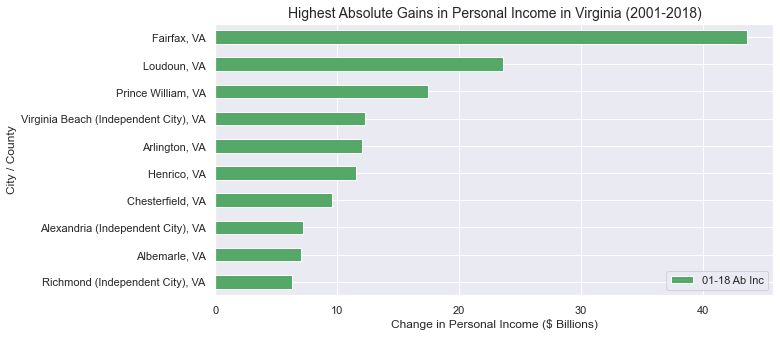

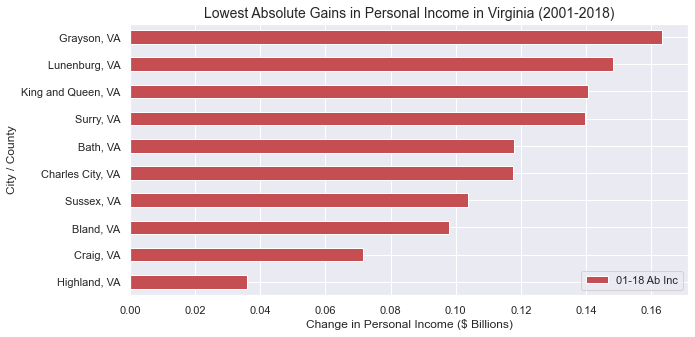

In [32]:
total_inc_ab.iloc[-10:].plot(kind='barh',color='g')
plt.title('Highest Absolute Gains in Personal Income in Virginia (2001-2018)',size=14)
plt.xlabel('Change in Personal Income ($ Billions)')
plt.show()
print() #We allow an extra space between our graphs for convenience.

total_inc_ab.iloc[:10].plot(kind='barh',color='r')
plt.title('Lowest Absolute Gains in Personal Income in Virginia (2001-2018)',size=14)
plt.xlabel('Change in Personal Income ($ Billions)')
plt.show()

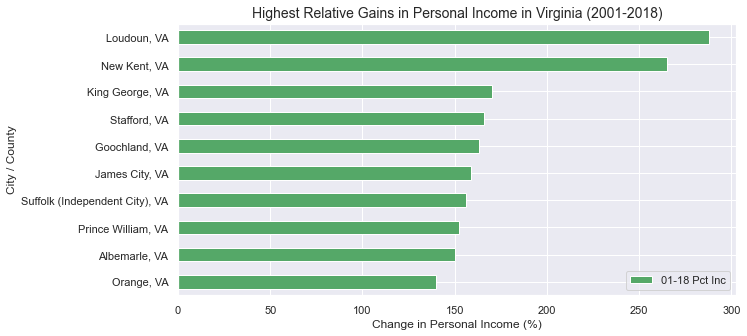

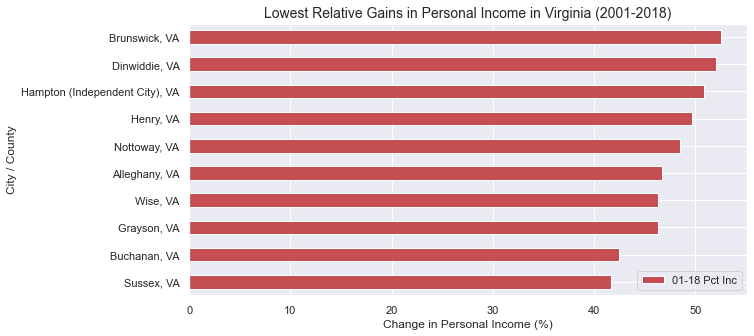

In [33]:
total_inc_pct.iloc[-10:].plot(kind='barh',color='g')
plt.title('Highest Relative Gains in Personal Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Personal Income (%)')
plt.show()
print()

total_inc_pct.iloc[:10].plot(kind='barh',color='r')
plt.title('Lowest Relative Gains in Personal Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Personal Income (%)')
plt.show()

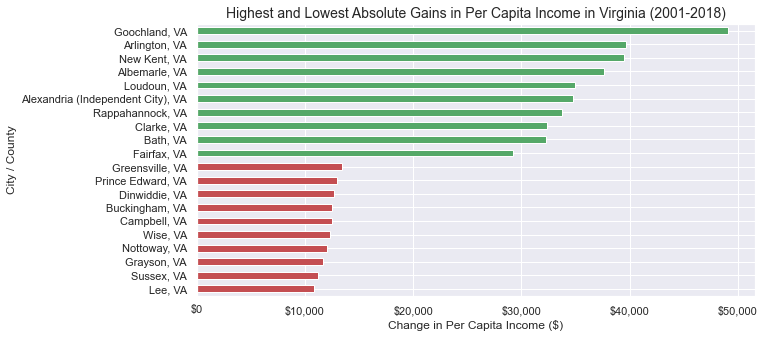

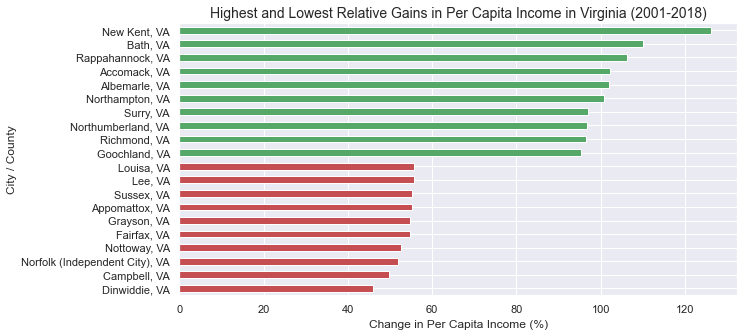

In [34]:
a = capita_inc_ab.iloc[np.r_[:10,-10:0],0].plot(kind='barh',color=['r','r','r','r','r','r','r','r','r','r',
                                                                   'g','g','g','g','g','g','g','g','g','g'])
plt.title('Highest and Lowest Absolute Gains in Per Capita Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Per Capita Income ($)')
fmt1 = '${x:,.0f}' #We format our X-axis in dollars separated by commas.
t1 = mtick.StrMethodFormatter(fmt1)
a.xaxis.set_major_formatter(t1)
plt.show()
print()

capita_inc_pct.iloc[np.r_[:10,-10:0],0].plot(kind='barh',color=['r','r','r','r','r','r','r','r','r','r',
                                                                'g','g','g','g','g','g','g','g','g','g'])
plt.title('Highest and Lowest Relative Gains in Per Capita Income in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Per Capita Income (%)')
plt.show()

## 5. Evaluating Trends in Population 

In [35]:
pop = pop_inc[(pop_inc.Description == 'Population')]
pop['01-18 Ab Pop'] = pop['2018']-pop['2001']
pop['01-18 Pct Pop'] = (pop['2018']-pop['2001'])/pop['2001']*100
pop.head()

#We calculate the absolute and relative changes in population throughout Virginia from 2001 to 2018.

Description               Unit      2001  \
City / County                                                                
Accomack, VA                       Population  Number of persons   37742.0   
Albemarle, VA                      Population  Number of persons  126438.0   
Alexandria (Independent City), VA  Population  Number of persons  130932.0   
Alleghany, VA                      Population  Number of persons   23401.0   
Amelia, VA                         Population  Number of persons   11481.0   

                                       2002      2003      2004      2005  \
City / County                                                               
Accomack, VA                        37308.0   36742.0   36310.0   35835.0   
Albemarle, VA                      127599.0  128315.0  129772.0  132273.0   
Alexandria (Independent City), VA  130614.0  129421.0  128765.0  128181.0   
Alleghany, VA                       23236.0   22917.0   22837.0   22653.0   
Amelia, VA                          11540.0   11544.0   11712.0   11943.0   

                                       2006      2007      2008  ...  \
City / County                                                    ...   
Accomack, VA                        35192.0   34553.0   33970.0  ...   
Albemarle, VA                      134918.0  136547.0  139211.0  ...   
Alexandria (Independent City), VA  127676.0  129175.0  132949.0  ...   
Alleghany, VA                       22543.0   22587.0   22395.0  ...   
Amelia, VA                          12250.0   12447.0   12563.0  ...   

                                       2011      2012      2013      2014  \
City / County                                                               
Accomack, VA                        33221.0   33264.0   32966.0   32970.0   
Albemarle, VA                      143960.0  146043.0  147286.0  149265.0   
Alexandria (Independent City), VA  144220.0  147314.0  149674.0  151431.0   
Alleghany, VA                       22075.0   21876.0   21751.0   21377.0   
Amelia, VA                          12752.0   12747.0   12659.0   12716.0   

                                       2015      2016      2017      2018  \
City / County                                                               
Accomack, VA                        32910.0   32850.0   32566.0   32412.0   
Albemarle, VA                      151552.0  153644.0  155690.0  156835.0   
Alexandria (Independent City), VA  153863.0  157045.0  159654.0  160530.0   
Alleghany, VA                       21081.0   20918.0   20593.0   20370.0   
Amelia, VA                          12782.0   12793.0   12965.0   13013.0   

                                   01-18 Ab Pop  01-18 Pct Pop  
City / County                                                   
Accomack, VA                            -5330.0     -14.122198  
Albemarle, VA                           30397.0      24.041032  
Alexandria (Independent City), VA       29598.0      22.605627  
Alleghany, VA                           -3031.0     -12.952438  
Amelia, VA                               1532.0      13.343785  

[5 rows x 22 columns]

In [36]:
pop_ab = pop.iloc[:,[20]].sort_values(by='01-18 Ab Pop')
pop_pct = pop.iloc[:,[21]].sort_values(by='01-18 Pct Pop')

#We create a dataframe sorting the absolute changes in population from low to high, as well as for the relative
#changes.

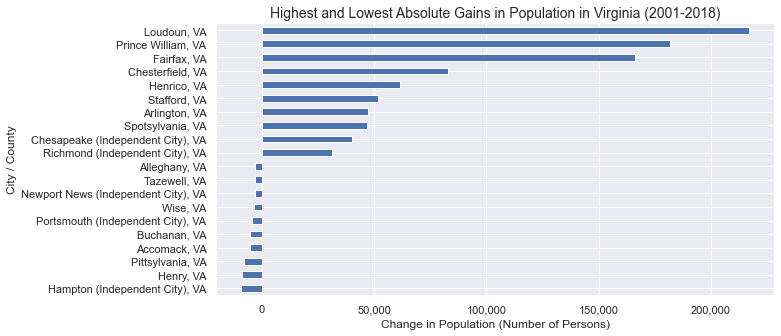

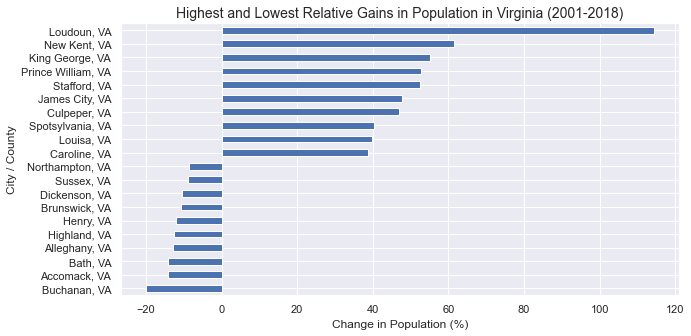

In [37]:
b = pop_ab.iloc[np.r_[:10,-10:0],0].plot(kind='barh')
plt.title('Highest and Lowest Absolute Gains in Population in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Population (Number of Persons)')
fmt2 = '{x:,.0f}' #We want to format our X-axis in terms of population figures separated by commas.
t2 = mtick.StrMethodFormatter(fmt2)
b.xaxis.set_major_formatter(t2)
plt.show()
print()

pop_pct.iloc[np.r_[:10,-10:0],0].plot(kind='barh')
plt.title('Highest and Lowest Relative Gains in Population in Virginia (2001-2018)', size=14)
plt.xlabel('Change in Population (%)')
plt.show()

## 6A. Evaluating Trends in GDP by Industry: Cleaning Up Our Data Further

In [38]:
ind_gdp['Total GDP'] = ind_gdp.iloc[:,2:20].sum(axis=1)
ind_gdp.head()

#We sum up all the GDPs by industry for each area together.

Description  \
City / County                                                      
Accomack, VA   Educational services, health care, and social ...   
Accomack, VA   Arts, entertainment, recreation, accommodation...   
Accomack, VA               Government and government enterprises   
Accomack, VA                        Natural resources and mining   
Accomack, VA                                               Trade   

                               Unit      2001      2002      2003      2004  \
City / County                                                                 
Accomack, VA   Thousands of dollars   27223.0   28647.0   32077.0   37547.0   
Accomack, VA   Thousands of dollars   34126.0   37456.0   39080.0   39118.0   
Accomack, VA   Thousands of dollars  156465.0  167679.0  175405.0  184208.0   
Accomack, VA   Thousands of dollars   83645.0   65085.0   88560.0  133653.0   
Accomack, VA   Thousands of dollars   76146.0   79415.0   85706.0   82571.0   

                   2005      2006      2007      2008  ...      2010  \
City / County                                          ...             
Accomack, VA    41549.0   42389.0   41554.0   48626.0  ...   48325.0   
Accomack, VA    38107.0   37866.0   39701.0   38467.0  ...   39535.0   
Accomack, VA   192721.0  197611.0  203717.0  210056.0  ...  225499.0   
Accomack, VA   134892.0  130349.0  119118.0  111748.0  ...  108568.0   
Accomack, VA        0.0   89493.0   86126.0   85456.0  ...   89499.0   

                   2011      2012      2013      2014      2015      2016  \
City / County                                                               
Accomack, VA    46856.0   50557.0       0.0       0.0       0.0       0.0   
Accomack, VA    41137.0   44429.0   45583.0   47178.0   47772.0   49971.0   
Accomack, VA   223419.0  229542.0  234298.0  247339.0  254782.0  258345.0   
Accomack, VA   118920.0  103134.0  138035.0  118326.0  102373.0   85647.0   
Accomack, VA    96774.0  100664.0  109832.0  110322.0  113873.0  115564.0   

                   2017      2018  Total GDP  
City / County                                 
Accomack, VA        0.0       0.0   495784.0  
Accomack, VA    51275.0   53617.0   762874.0  
Accomack, VA   267064.0  273468.0  3920432.0  
Accomack, VA    97286.0   88750.0  1941237.0  
Accomack, VA   116106.0  120973.0  1644048.0  

[5 rows x 21 columns]

In [39]:
utilities = ind_gdp[(ind_gdp.Description=='Utilities')]
construct = ind_gdp[(ind_gdp.Description=='Construction')]
manu = ind_gdp[(ind_gdp.Description=='Manufacturing')]
transport = ind_gdp[(ind_gdp.Description=='Transportation and warehousing')]
info = ind_gdp[(ind_gdp.Description=='Information')]
finance = ind_gdp[(ind_gdp.Description=='Finance, insurance, real estate, rental, and leasing')]
prof = ind_gdp[(ind_gdp.Description=='Professional and business services')]
educ_health = ind_gdp[(ind_gdp.Description=='Educational services, health care, and social assistance')]
arts = ind_gdp[(ind_gdp.Description=='Arts, entertainment, recreation, accommodation, and food services')]
other = ind_gdp[(ind_gdp.Description=='Other services (except government and government enterprises)')]
govt = ind_gdp[(ind_gdp.Description=='Government and government enterprises')]
natural = ind_gdp[(ind_gdp.Description=='Natural resources and mining')]
trade = ind_gdp[(ind_gdp.Description=='Trade')]

#Each industry gets assigned to its own dataframe.

In [40]:
utilities = utilities.iloc[:,[0,1,20]]
construct = construct.iloc[:,[0,1,20]]
manu = manu.iloc[:,[0,1,20]]
transport = transport.iloc[:,[0,1,20]]
info = info.iloc[:,[0,1,20]]
finance = finance.iloc[:,[0,1,20]]
prof = prof.iloc[:,[0,1,20]]
educ_health = educ_health.iloc[:,[0,1,20]]
arts = arts.iloc[:,[0,1,20]]
other = other.iloc[:,[0,1,20]]
govt = govt.iloc[:,[0,1,20]]
natural = natural.iloc[:,[0,1,20]]
trade = trade.iloc[:,[0,1,20]]

#We isolate each industry's total GDP.

In [41]:
utilities.head()

Description                  Unit  Total GDP
City / County                                                                 
Accomack, VA                        Utilities  Thousands of dollars   244069.0
Albemarle, VA                       Utilities  Thousands of dollars   304137.0
Alexandria (Independent City), VA   Utilities  Thousands of dollars   240045.0
Alleghany, VA                       Utilities  Thousands of dollars   536721.0
Amelia, VA                          Utilities  Thousands of dollars    23576.0

In [42]:
total = [utilities['Total GDP'] + construct['Total GDP'] + manu['Total GDP'] + transport['Total GDP'] + 
         info['Total GDP'] + finance['Total GDP'] + prof['Total GDP'] + educ_health['Total GDP'] + 
         arts['Total GDP'] + other['Total GDP'] + govt['Total GDP'] + natural['Total GDP'] + trade['Total GDP']]
total = pd.DataFrame(total)
total

#We now sum up all the industry GDPs incorporating the years 2001 through 2018 together, and proceed to create a new
#dataframe including those sums by area.

City / County  Accomack, VA  Albemarle, VA  Alexandria (Independent City), VA  \
Total GDP        37336055.0    141730622.0                        228049474.0   

City / County  Alleghany, VA  Amelia, VA  Amherst, VA  Appomattox, VA  \
Total GDP          8931257.0   4697019.0   12311982.0       4395793.0   

City / County  Arlington, VA  Augusta, VA   Bath, VA  ...   Surry, VA  \
Total GDP        471951943.0   56712211.0  3674678.0  ...  18958417.0   

City / County  Sussex, VA  Tazewell, VA  \
Total GDP       5036141.0    22774315.0   

City / County  Virginia Beach (Independent City), VA  Warren, VA  \
Total GDP                                320266949.0  17086275.0   

City / County  Washington, VA  Westmoreland, VA    Wise, VA   Wythe, VA  \
Total GDP          38672558.0         6002795.0  28135843.0  20131538.0   

City / County    York, VA  
Total GDP      34244953.0  

[1 rows x 105 columns]

In [43]:
total = total.transpose()
total['Total GDP'] = total['Total GDP']*1000/(10**9)
total.head()

#We alter the shape of our dataframe by allocating the cities and counties under the index column and rename our value
#column to 'Total GDP' for consistency.  In addition, upon observing from our previous database that our units were in 
#thousands of dollars, we convert our total GDP figures into billions here.

Total GDP
City / County                                
Accomack, VA                        37.336055
Albemarle, VA                      141.730622
Alexandria (Independent City), VA  228.049474
Alleghany, VA                        8.931257
Amelia, VA                           4.697019

In [44]:
total['Utilities'] = utilities['Total GDP']*1000/(10**9)
total['Construction'] = construct['Total GDP']*1000/(10**9)
total['Manufacturing'] = manu['Total GDP']*1000/(10**9)
total['Transportation'] = transport['Total GDP']*1000/(10**9)
total['Information'] = info['Total GDP']*1000/(10**9)
total['Finance'] = finance['Total GDP']*1000/(10**9)
total['Professional Services'] = prof['Total GDP']*1000/(10**9)
total['Education / Health'] = educ_health['Total GDP']*1000/(10**9)
total['Arts / Entertainment'] = arts['Total GDP']*1000/(10**9)
total['Other Services'] = other['Total GDP']*1000/(10**9)
total['Government'] = govt['Total GDP']*1000/(10**9)
total['Natural Resources'] = natural['Total GDP']*1000/(10**9)
total['Trade'] = trade['Total GDP']*1000/(10**9)
total.head()

#Each industry's total GDP from 2001 to 2018 gets its own column and also converts into billions.

Total GDP  Utilities  Construction  \
City / County                                                            
Accomack, VA                        37.336055   0.244069      0.748364   
Albemarle, VA                      141.730622   0.304137      6.472961   
Alexandria (Independent City), VA  228.049474   0.240045      6.430297   
Alleghany, VA                        8.931257   0.536721      0.459170   
Amelia, VA                           4.697019   0.023576      0.464110   

                                   Manufacturing  Transportation  Information  \
City / County                                                                   
Accomack, VA                           20.685859        0.128772     0.232184   
Albemarle, VA                           4.706183        0.000000     6.013587   
Alexandria (Independent City), VA       0.619851        3.040367     8.874366   
Alleghany, VA                           0.494300        0.346161     0.000000   
Amelia, VA                              0.364205        0.058966     0.021735   

                                     Finance  Professional Services  \
City / County                                                         
Accomack, VA                        4.010465               2.005698   
Albemarle, VA                      31.993336              18.624651   
Alexandria (Independent City), VA  47.857114              58.837187   
Alleghany, VA                       2.437811               0.686992   
Amelia, VA                          0.855842               0.410122   

                                   Education / Health  Arts / Entertainment  \
City / County                                                                 
Accomack, VA                                 0.495784              0.762874   
Albemarle, VA                               13.134388              6.833805   
Alexandria (Independent City), VA           10.861439              6.388713   
Alleghany, VA                                1.010971              0.293714   
Amelia, VA                                   0.264835              0.043624   

                                   Other Services  Government  \
City / County                                                   
Accomack, VA                             0.516269    3.920432   
Albemarle, VA                            4.586272   43.129622   
Alexandria (Independent City), VA       16.594492   56.774372   
Alleghany, VA                            0.380599    1.645292   
Amelia, VA                               0.154925    0.580338   

                                   Natural Resources      Trade  
City / County                                                    
Accomack, VA                                1.941237   1.644048  
Albemarle, VA                               0.169251   5.762429  
Alexandria (Independent City), VA           0.000972  11.530259  
Alleghany, VA                               0.012304   0.627222  
Amelia, VA                                  0.766819   0.687922

In [45]:
total['Utilities Share'] = total['Utilities']/total['Total GDP']*100
total['Construction Share'] = total['Construction']/total['Total GDP']*100
total['Manufacturing Share'] = total['Manufacturing']/total['Total GDP']*100
total['Transportation Share'] = total['Transportation']/total['Total GDP']*100
total['Information Share'] = total['Information']/total['Total GDP']*100
total['Finance Share'] = total['Finance']/total['Total GDP']*100
total['Professional Services Share'] = total['Professional Services']/total['Total GDP']*100
total['Education / Health Share'] = total['Education / Health']/total['Total GDP']*100
total['Arts / Entertainment Share'] = total['Arts / Entertainment']/total['Total GDP']*100
total['Other Services Share'] = total['Other Services']/total['Total GDP']*100
total['Government Share'] = total['Government']/total['Total GDP']*100
total['Natural Resources Share'] = total['Natural Resources']/total['Total GDP']*100
total['Trade Share'] = total['Trade']/total['Total GDP']*100
total.head()

#We calculate industry's share of total GDP from 2001 to 2018.

Total GDP  Utilities  Construction  \
City / County                                                            
Accomack, VA                        37.336055   0.244069      0.748364   
Albemarle, VA                      141.730622   0.304137      6.472961   
Alexandria (Independent City), VA  228.049474   0.240045      6.430297   
Alleghany, VA                        8.931257   0.536721      0.459170   
Amelia, VA                           4.697019   0.023576      0.464110   

                                   Manufacturing  Transportation  Information  \
City / County                                                                   
Accomack, VA                           20.685859        0.128772     0.232184   
Albemarle, VA                           4.706183        0.000000     6.013587   
Alexandria (Independent City), VA       0.619851        3.040367     8.874366   
Alleghany, VA                           0.494300        0.346161     0.000000   
Amelia, VA                              0.364205        0.058966     0.021735   

                                     Finance  Professional Services  \
City / County                                                         
Accomack, VA                        4.010465               2.005698   
Albemarle, VA                      31.993336              18.624651   
Alexandria (Independent City), VA  47.857114              58.837187   
Alleghany, VA                       2.437811               0.686992   
Amelia, VA                          0.855842               0.410122   

                                   Education / Health  Arts / Entertainment  \
City / County                                                                 
Accomack, VA                                 0.495784              0.762874   
Albemarle, VA                               13.134388              6.833805   
Alexandria (Independent City), VA           10.861439              6.388713   
Alleghany, VA                                1.010971              0.293714   
Amelia, VA                                   0.264835              0.043624   

                                   ...  Transportation Share  \
City / County                      ...                         
Accomack, VA                       ...              0.344900   
Albemarle, VA                      ...              0.000000   
Alexandria (Independent City), VA  ...              1.333205   
Alleghany, VA                      ...              3.875837   
Amelia, VA                         ...              1.255392   

                                   Information Share  Finance Share  \
City / County                                                         
Accomack, VA                                0.621876      10.741534   
Albemarle, VA                               4.242969      22.573341   
Alexandria (Independent City), VA           3.891421      20.985409   
Alleghany, VA                               0.000000      27.295273   
Amelia, VA                                  0.462740      18.220961   

                                   Professional Services Share  \
City / County                                                    
Accomack, VA                                          5.372014   
Albemarle, VA                                        13.140880   
Alexandria (Independent City), VA                    25.800185   
Alleghany, VA                                         7.691997   
Amelia, VA                                            8.731538   

                                   Education / Health Share  \
City / County                                                 
Accomack, VA                                       1.327896   
Albemarle, VA                                      9.267149   
Alexandria (Independent City), VA                  4.762756   
Alleghany, VA                                     11.319470   
Amelia, VA                                         5.638363   

                                   Arts / Ent

## 6B. Evaluating Trends in GDP by Industry: Comparing with Total GDP

In [46]:
def test1(df, x):
    df = df.loc[:, x].sort_values(ascending=False).head(10)
    df.plot(kind='bar', color=sb.color_palette(), sort_columns=True)
    y = str(x)
    plt.title('10 Virginia Cities / Counties with the Highest '+y+' of\n Total GDP from 2001 to 2018',size=14)
    plt.xlabel('City / County')
    plt.ylabel('Share of GDP (%)')
    plt.show()

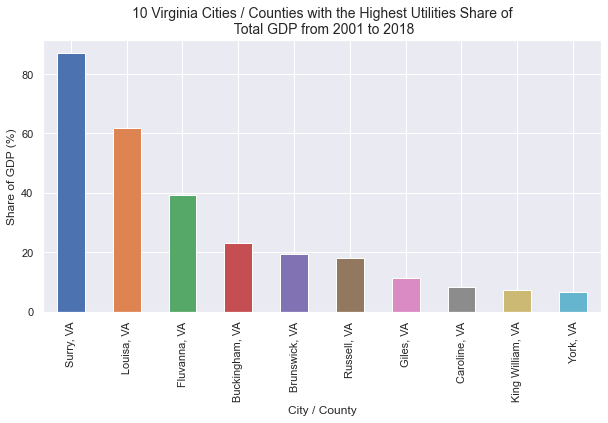

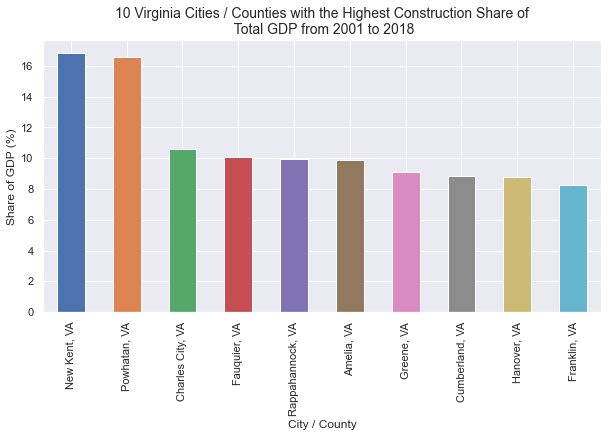

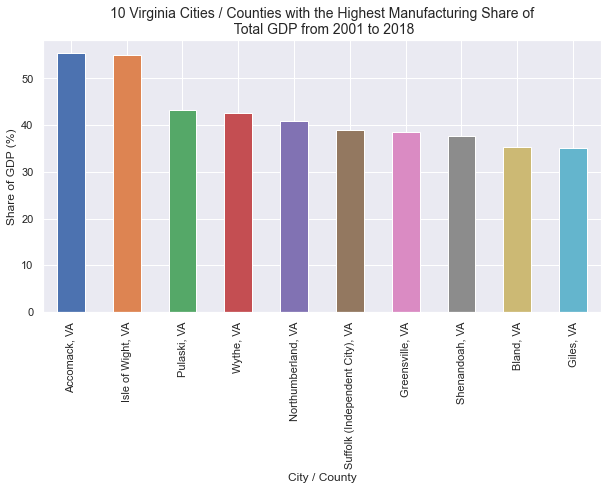

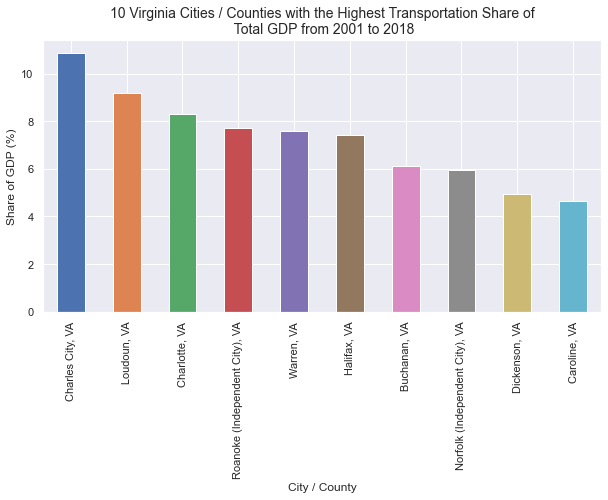

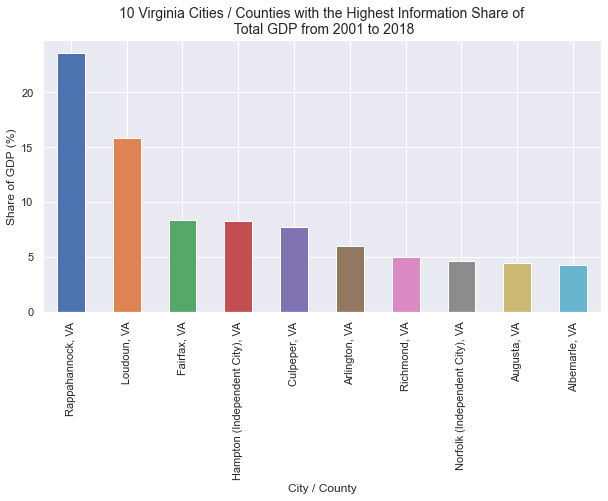

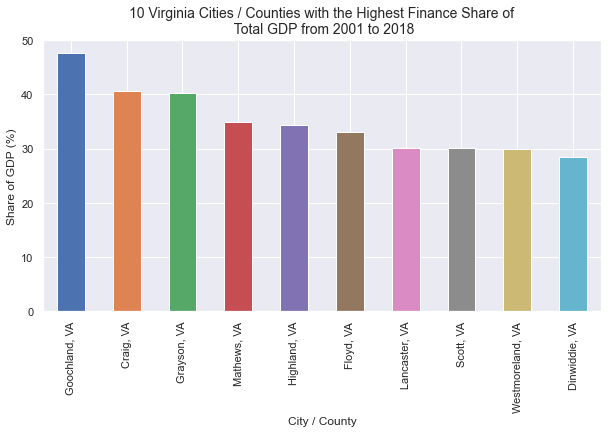

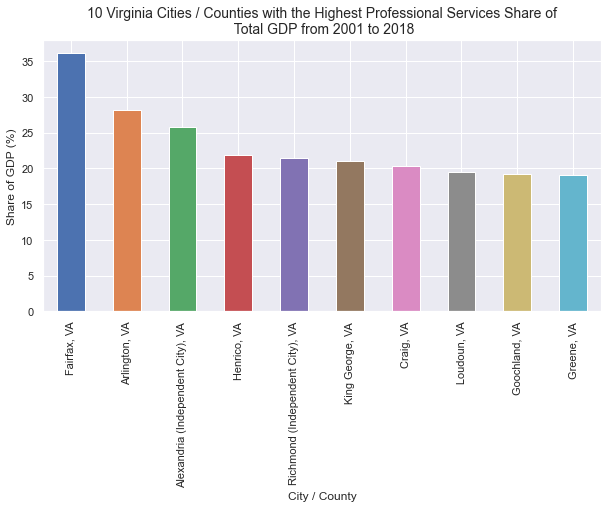

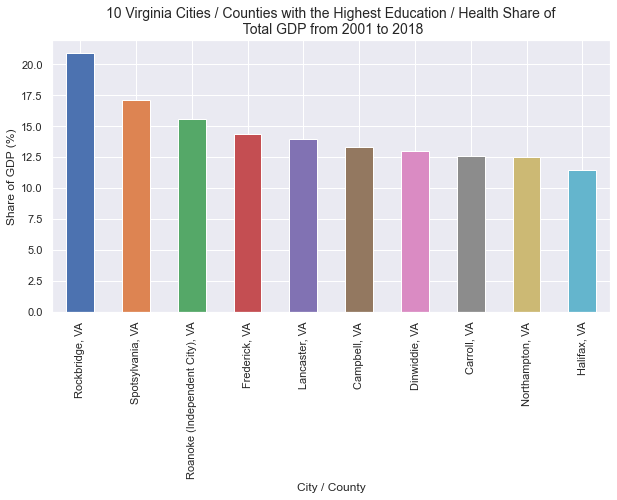

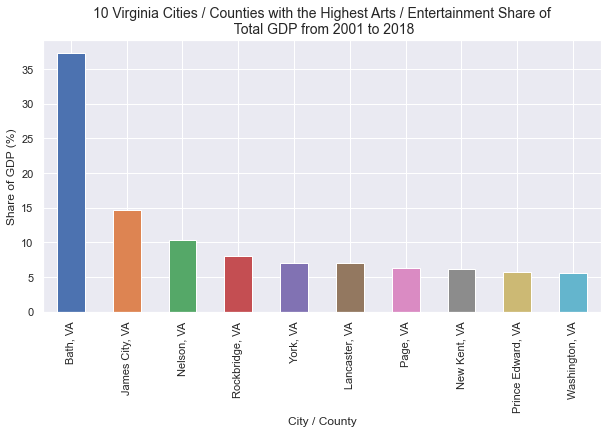

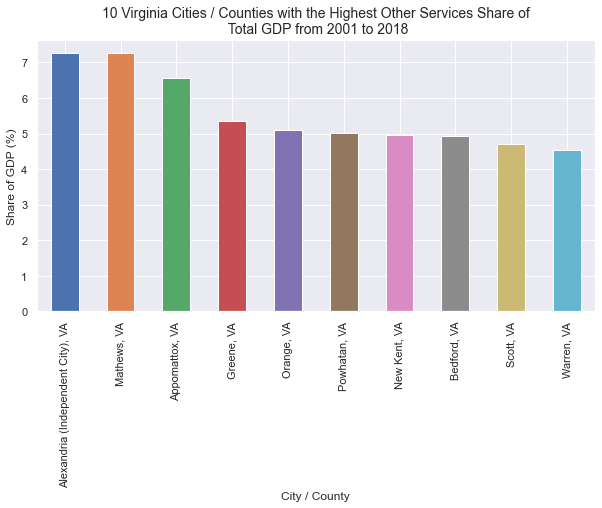

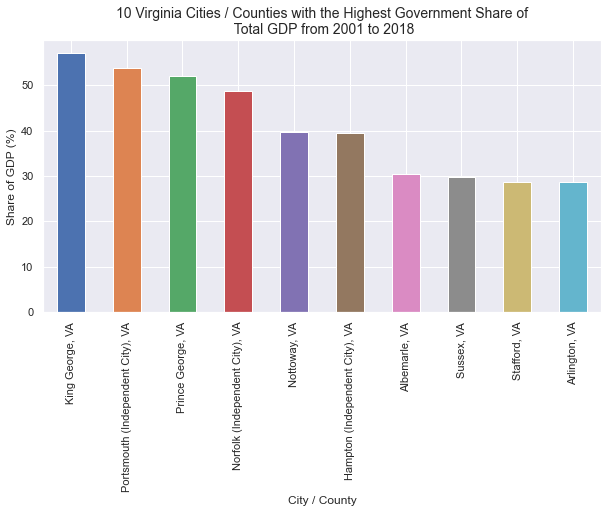

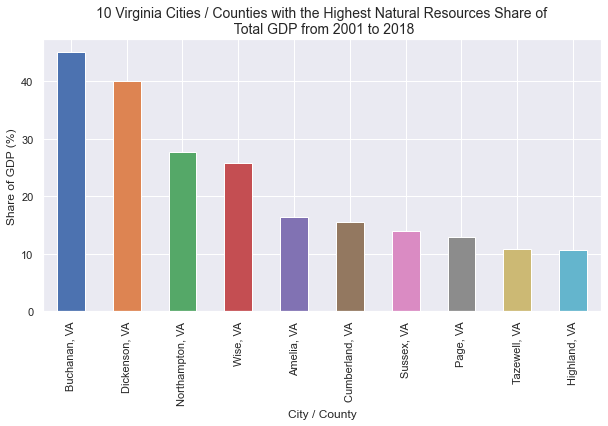

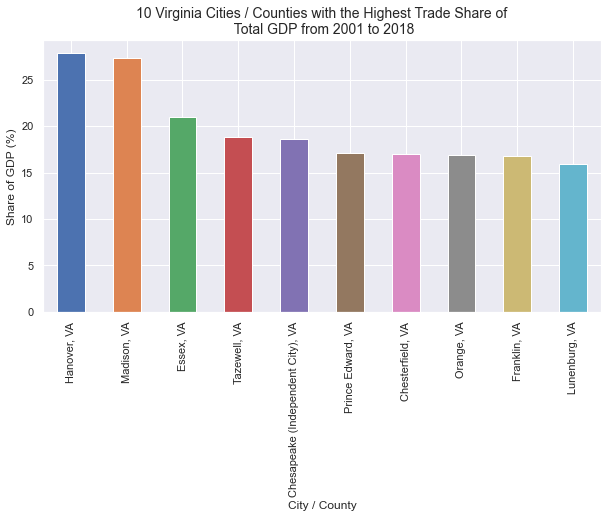

In [47]:
test1(total,'Utilities Share')
print()
test1(total,'Construction Share')
print()
test1(total,'Manufacturing Share')
print()
test1(total,'Transportation Share')
print()
test1(total,'Information Share')
print()
test1(total,'Finance Share')
print()
test1(total,'Professional Services Share')
print()
test1(total,'Education / Health Share')
print()
test1(total,'Arts / Entertainment Share')
print()
test1(total,'Other Services Share')
print()
test1(total,'Government Share')
print()
test1(total,'Natural Resources Share')
print()
test1(total,'Trade Share')

In [48]:
top_utilities = total.loc[:,['Total GDP','Utilities Share']].sort_values(
    by='Utilities Share').tail(10)
top_construct = total.loc[:,['Total GDP','Construction Share']].sort_values(
    by='Construction Share').tail(10)
top_manu = total.loc[:,['Total GDP','Manufacturing Share']].sort_values(
    by='Manufacturing Share').tail(10)
top_transport = total.loc[:,['Total GDP','Transportation Share']].sort_values(
    by='Transportation Share').tail(10)
top_info = total.loc[:,['Total GDP','Information Share']].sort_values(
    by='Information Share').tail(10)
top_finance = total.loc[:,['Total GDP','Finance Share']].sort_values(
    by='Finance Share').tail(10)
top_prof = total.loc[:,['Total GDP','Professional Services Share']].sort_values(
    by='Professional Services Share').tail(10)
top_educ_health = total.loc[:,['Total GDP','Education / Health Share']].sort_values(
    by='Education / Health Share').tail(10)
top_arts = total.loc[:,['Total GDP','Arts / Entertainment Share']].sort_values(
    by='Arts / Entertainment Share').tail(10)
top_other = total.loc[:,['Total GDP','Other Services Share']].sort_values(
    by='Other Services Share').tail(10)
top_govt = total.loc[:,['Total GDP','Government Share']].sort_values(
    by='Government Share').tail(10)
top_natural = total.loc[:,['Total GDP','Natural Resources Share']].sort_values(
    by='Natural Resources Share').tail(10)
top_trade = total.loc[:,['Total GDP','Trade Share']].sort_values(
    by='Trade Share').tail(10)

In [49]:
top_utilities

Total GDP  Utilities Share
City / County                               
York, VA          34.244953         6.605741
King William, VA   7.073872         7.372440
Caroline, VA       8.665655         8.256364
Giles, VA          8.274669        11.143322
Russell, VA       12.554543        18.122213
Brunswick, VA      7.318215        19.392092
Buckingham, VA     6.294093        23.012736
Fluvanna, VA      11.113308        39.363041
Louisa, VA        30.525168        61.684869
Surry, VA         18.958417        87.218226

In [50]:
def test2(df, o):
    df = df
    c = sb.scatterplot(x=df.iloc[:,1], y=df.iloc[:,0], hue=df.index, s=200, data=df)
    o = str(o)
    plt.title('Top 10 Virginia Cities / Counties in Terms of '+o+' vs.\n Total GDP from 2001 to 2018', size=14)
    plt.xlabel(o+str(' of GDP (%)'))
    plt.ylabel('Total GDP ($ Billions)')
    t3 = mtick.FormatStrFormatter('$%1.0f') #We format our Y-axis as billions with dollar signs.
    c.yaxis.set_major_formatter(t3)
    plt.legend(loc=(1.05,0))
    plt.show()

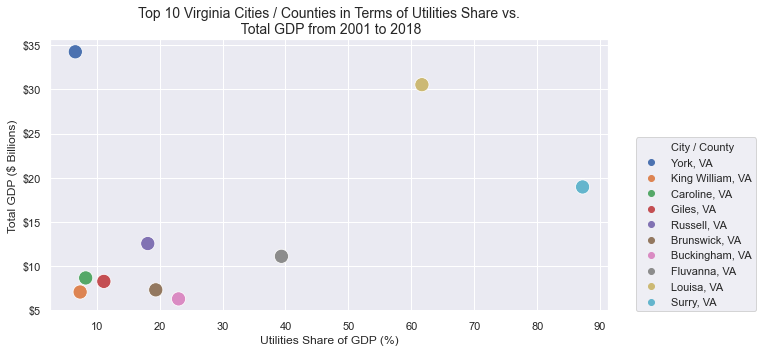

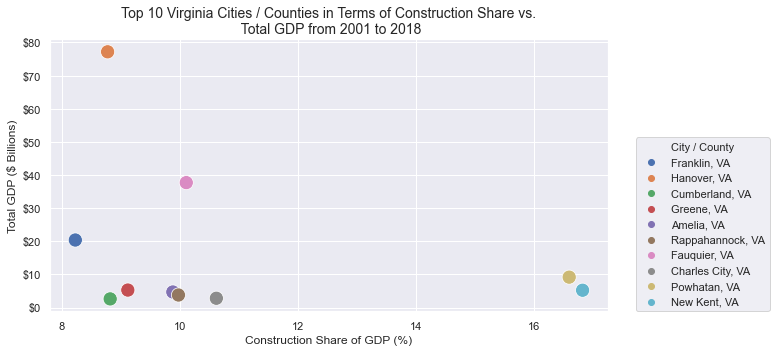

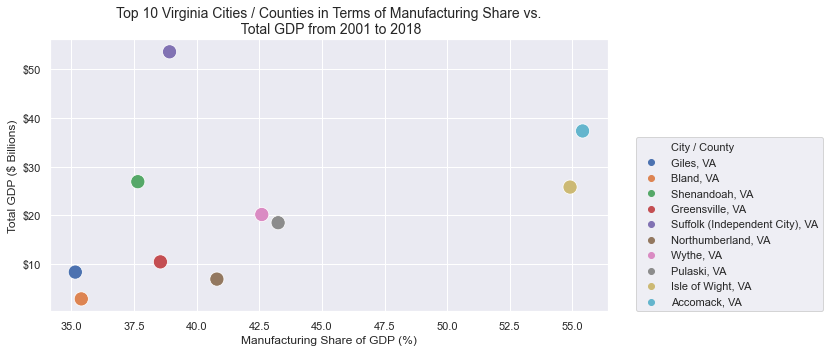

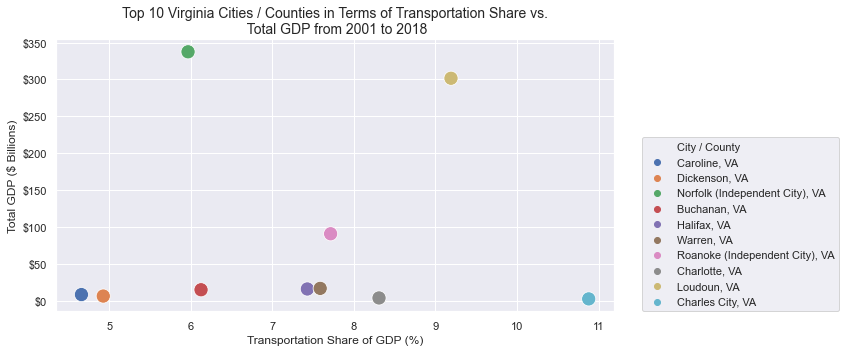

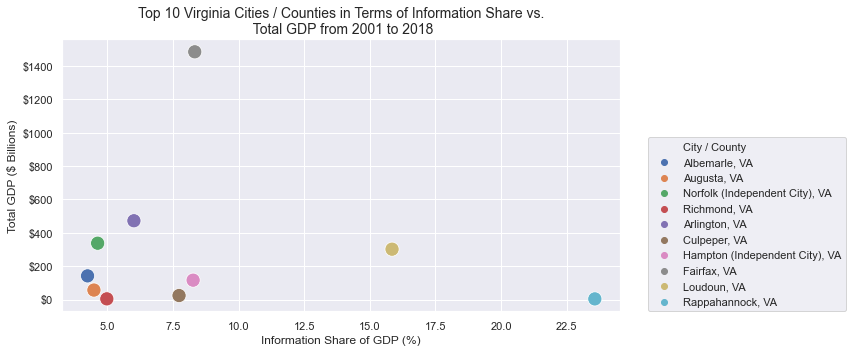

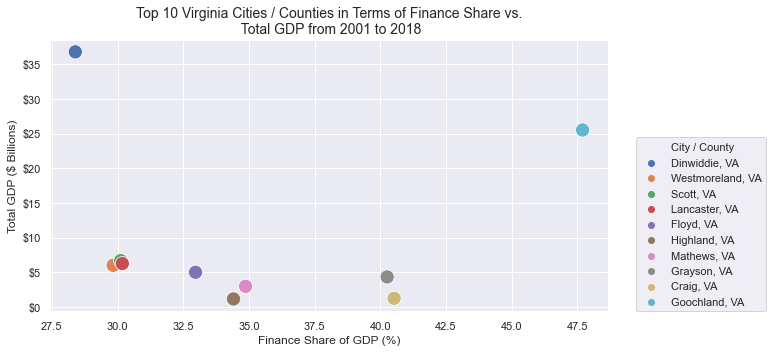

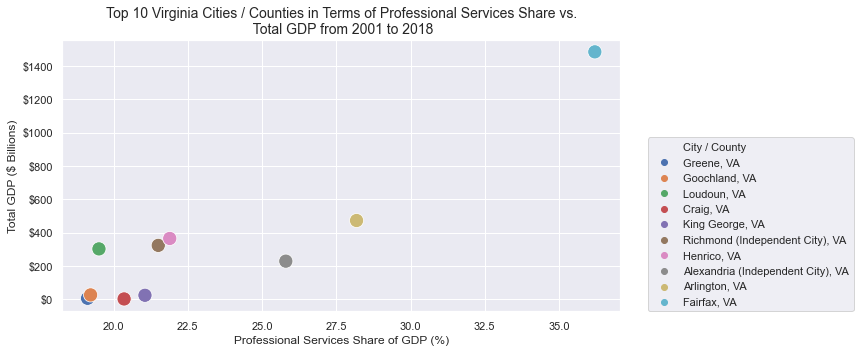

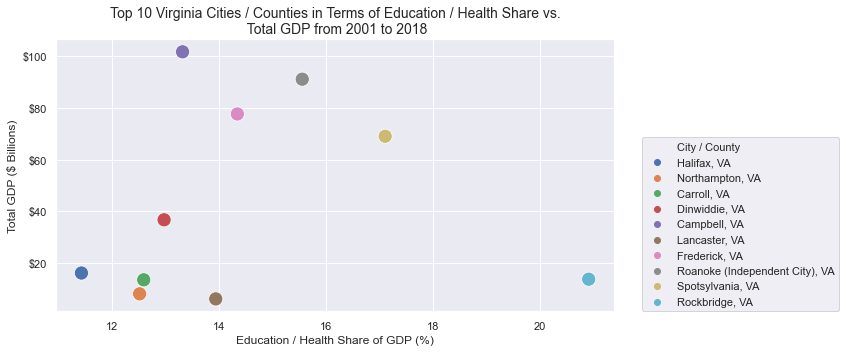

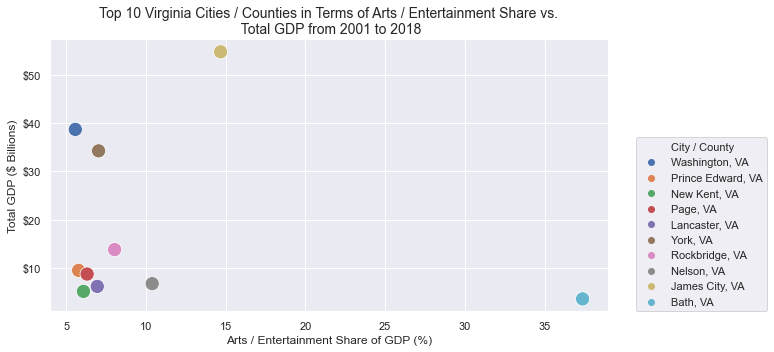

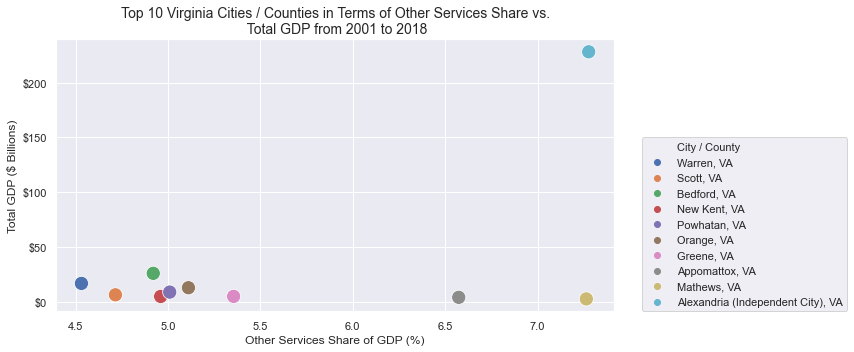

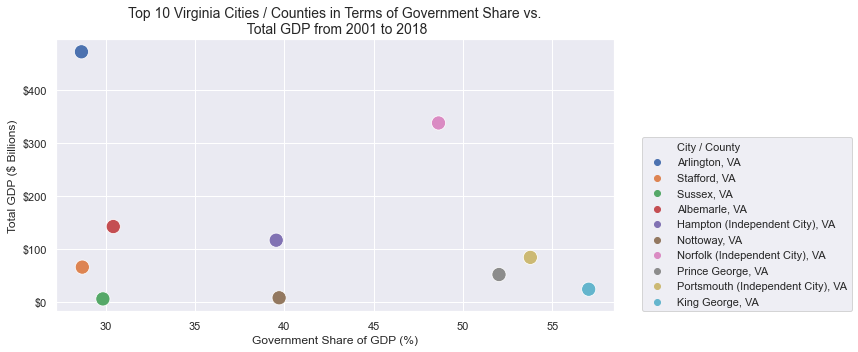

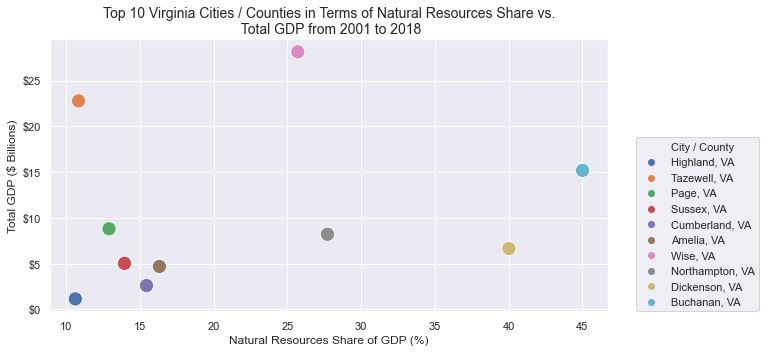

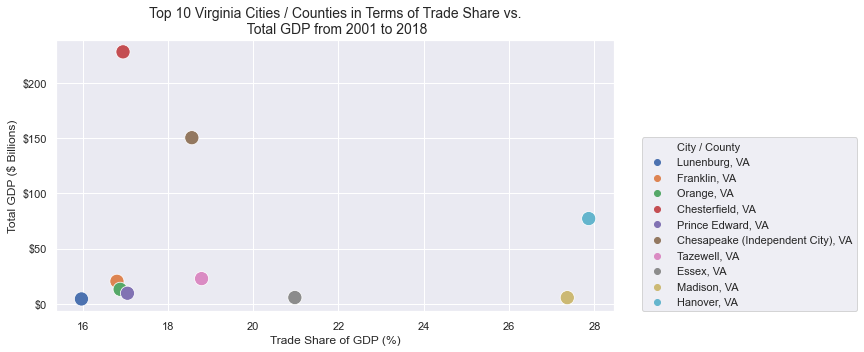

In [51]:
test2(top_utilities,'Utilities Share')
print()
test2(top_construct,'Construction Share')
print()
test2(top_manu,'Manufacturing Share')
print()
test2(top_transport,'Transportation Share')
print()
test2(top_info,'Information Share')
print()
test2(top_finance,'Finance Share')
print()
test2(top_prof,'Professional Services Share')
print()
test2(top_educ_health,'Education / Health Share')
print()
test2(top_arts,'Arts / Entertainment Share')
print()
test2(top_other,'Other Services Share')
print()
test2(top_govt,'Government Share')
print()
test2(top_natural,'Natural Resources Share')
print()
test2(top_trade,'Trade Share')

## 6C. Evaluating Trends in GDP by Industry: Comparing with Personal Income

In [52]:
top_utilities = top_utilities.merge(total_inc_pct, on=['City / County'])
top_construct = top_construct.merge(total_inc_pct, on=['City / County'])
top_manu = top_manu.merge(total_inc_pct, on=['City / County'])
top_transport = top_transport.merge(total_inc_pct, on=['City / County'])
top_info = top_info.merge(total_inc_pct, on=['City / County'])
top_finance = top_finance.merge(total_inc_pct, on=['City / County'])
top_prof = top_prof.merge(total_inc_pct, on=['City / County'])
top_educ_health = top_educ_health.merge(total_inc_pct, on=['City / County'])
top_arts = top_arts.merge(total_inc_pct, on=['City / County'])
top_other = top_other.merge(total_inc_pct, on=['City / County'])
top_govt = top_govt.merge(total_inc_pct, on=['City / County'])
top_natural = top_natural.merge(total_inc_pct, on=['City / County'])
top_trade = top_trade.merge(total_inc_pct, on=['City / County'])

In [53]:
def test3(df, p):
    df = df
    c = sb.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], hue=df.index, s=200, data=df)
    p = str(p)
    plt.title('Top 10 Virginia Cities / Counties in Terms of '+p+
              ' vs.\n Relative Change in Personal Income from 2001 to 2018', size=14)
    plt.xlabel(p+str(' of GDP (%)'))
    plt.ylabel('Change in Personal Income (%)')
    plt.legend(loc=(1.05,0))
    plt.show()

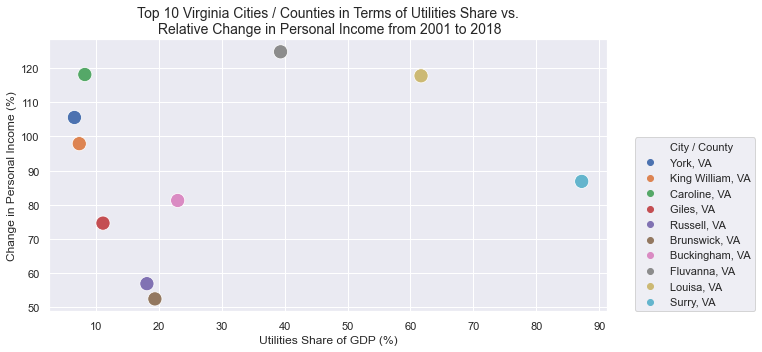

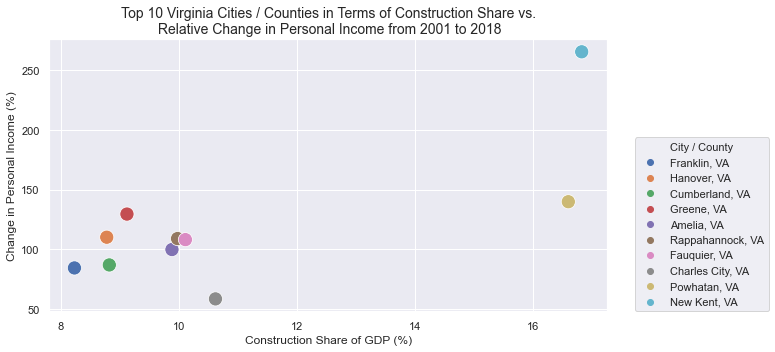

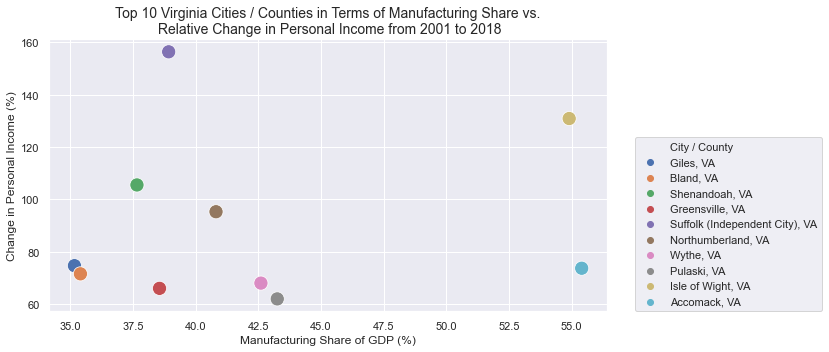

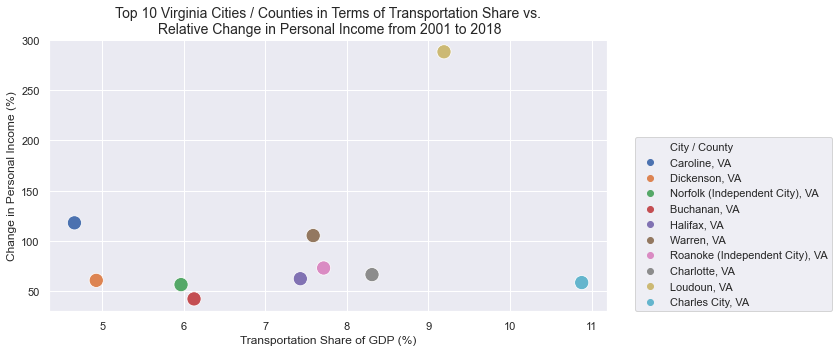

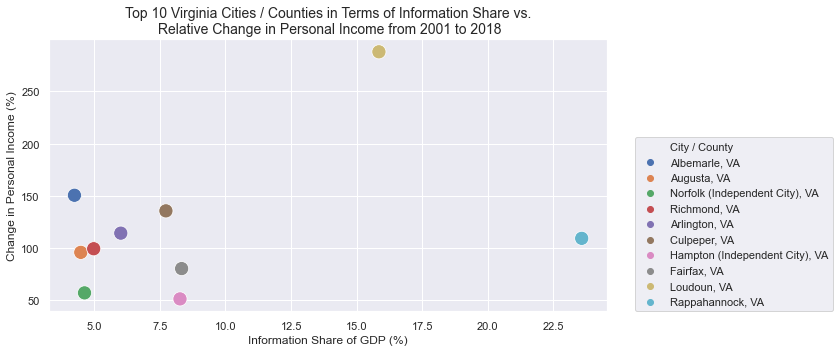

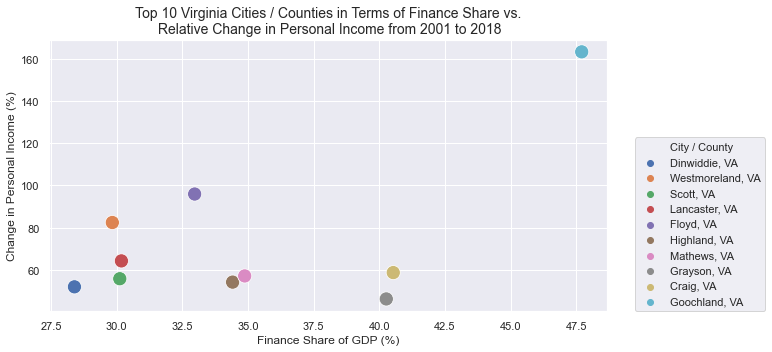

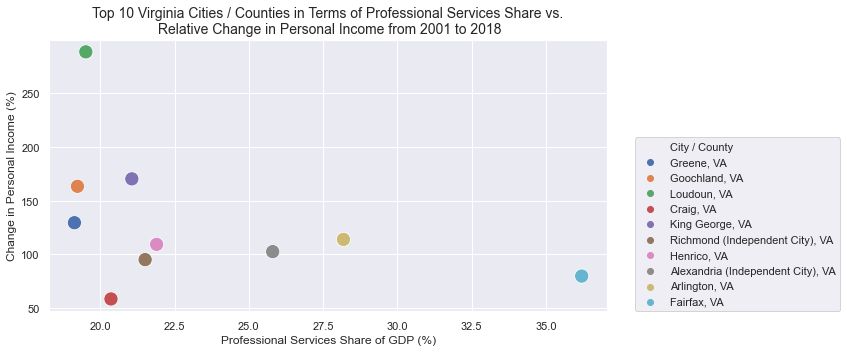

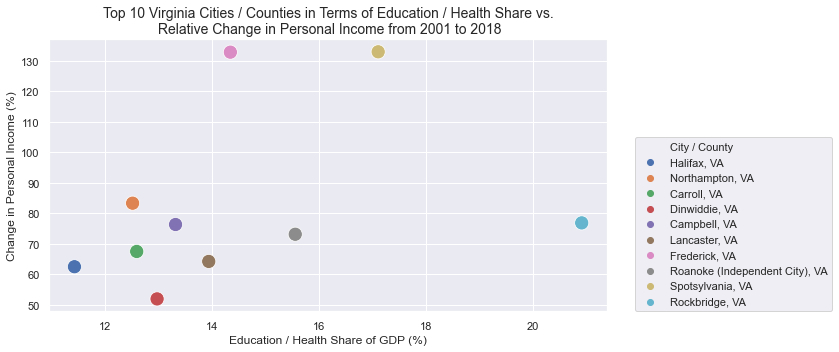

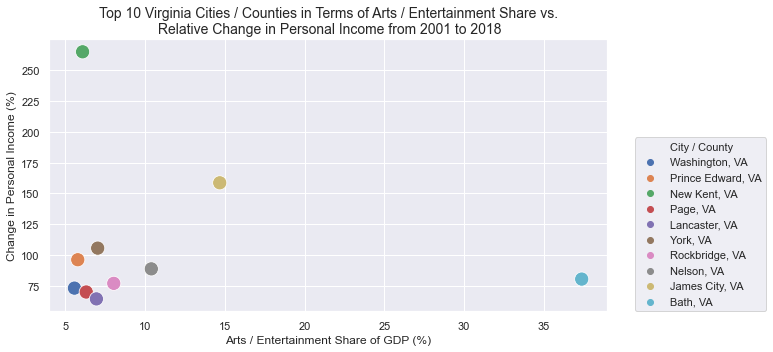

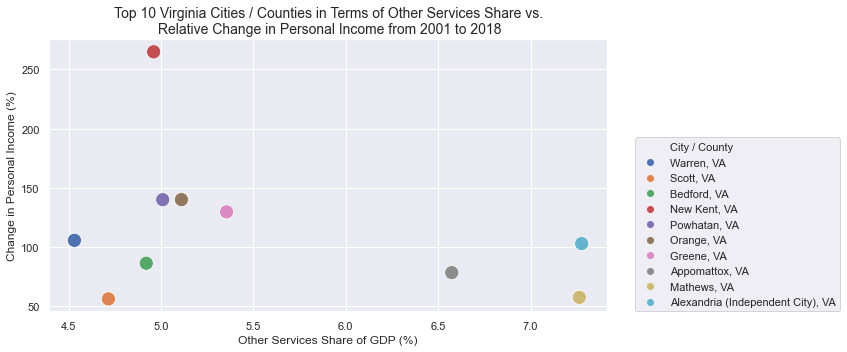

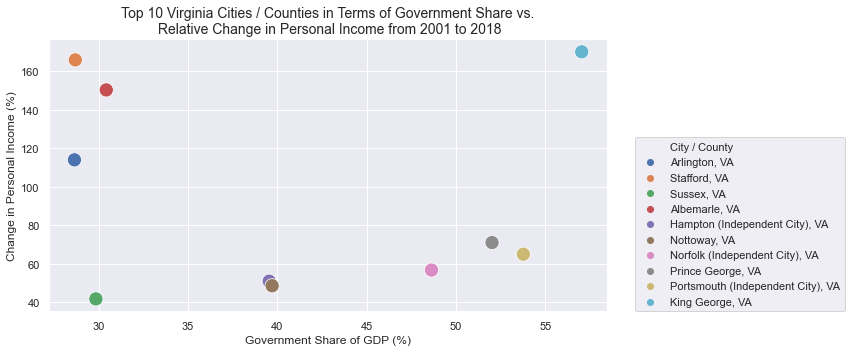

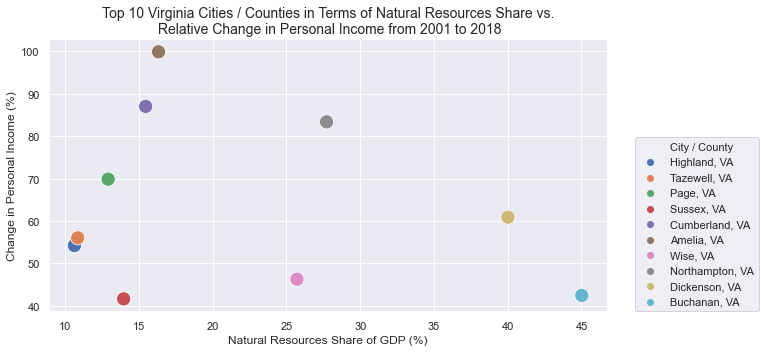

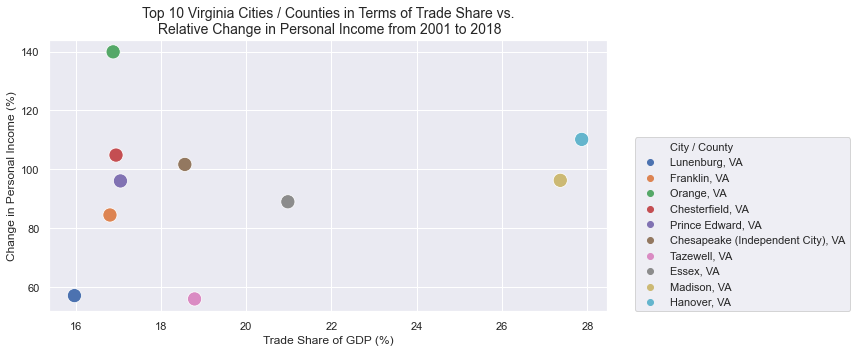

In [54]:
test3(top_utilities,'Utilities Share')
print()
test3(top_construct,'Construction Share')
print()
test3(top_manu,'Manufacturing Share')
print()
test3(top_transport,'Transportation Share')
print()
test3(top_info,'Information Share')
print()
test3(top_finance,'Finance Share')
print()
test3(top_prof,'Professional Services Share')
print()
test3(top_educ_health,'Education / Health Share')
print()
test3(top_arts,'Arts / Entertainment Share')
print()
test3(top_other,'Other Services Share')
print()
test3(top_govt,'Government Share')
print()
test3(top_natural,'Natural Resources Share')
print()
test3(top_trade,'Trade Share')

## 6D. Evaluating Trends in GDP by Industry: Comparing with Per Capita Income

In [55]:
top_utilities = top_utilities.merge(capita_inc_pct, on=['City / County'])
top_construct = top_construct.merge(capita_inc_pct, on=['City / County'])
top_manu = top_manu.merge(capita_inc_pct, on=['City / County'])
top_transport = top_transport.merge(capita_inc_pct, on=['City / County'])
top_info = top_info.merge(capita_inc_pct, on=['City / County'])
top_finance = top_finance.merge(capita_inc_pct, on=['City / County'])
top_prof = top_prof.merge(capita_inc_pct, on=['City / County'])
top_educ_health = top_educ_health.merge(capita_inc_pct, on=['City / County'])
top_arts = top_arts.merge(capita_inc_pct, on=['City / County'])
top_other = top_other.merge(capita_inc_pct, on=['City / County'])
top_govt = top_govt.merge(capita_inc_pct, on=['City / County'])
top_natural = top_natural.merge(capita_inc_pct, on=['City / County'])
top_trade = top_trade.merge(capita_inc_pct, on=['City / County'])

In [56]:
def test4(df, q):
    df = df
    d = sb.scatterplot(x=df.iloc[:,1], y=df.iloc[:,3], hue=df.index, s=200, data=df)
    q = str(q)
    plt.title('Top 10 Virginia Cities / Counties in Terms of '+q+
              ' vs.\n Relative Change in Per Capita Income from 2001 to 2018', size=14)
    plt.xlabel(q+str(' of GDP (%)'))
    plt.ylabel('Change in Per Capita Income (%)')
    plt.legend(loc=(1.05,0))
    plt.show()

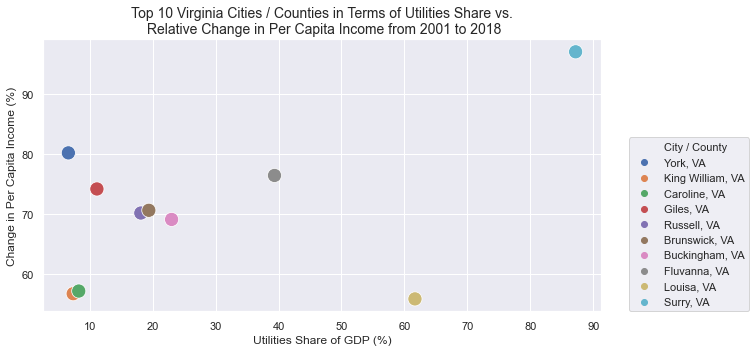

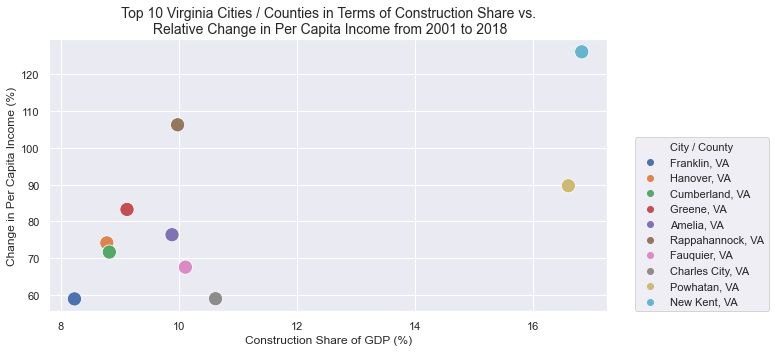

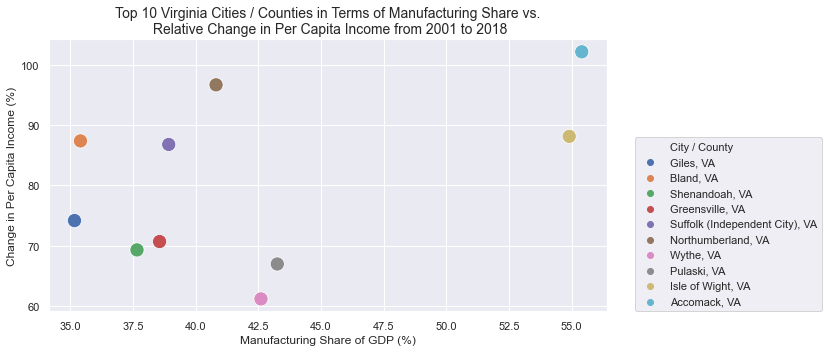

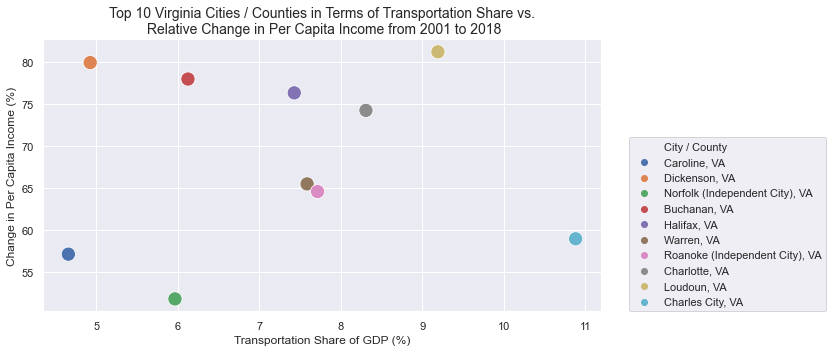

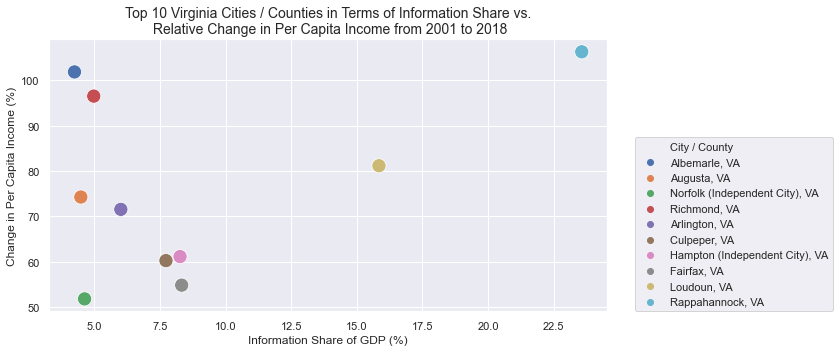

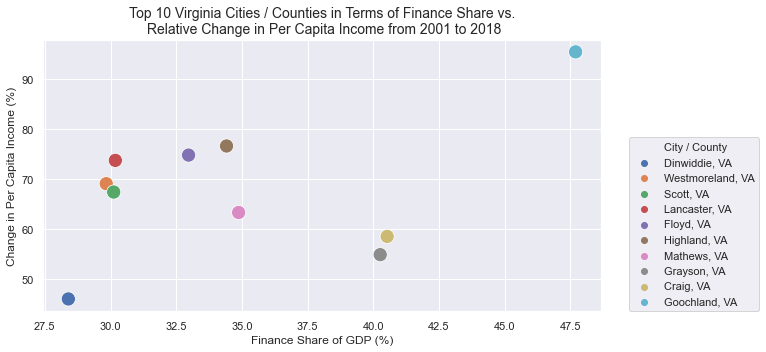

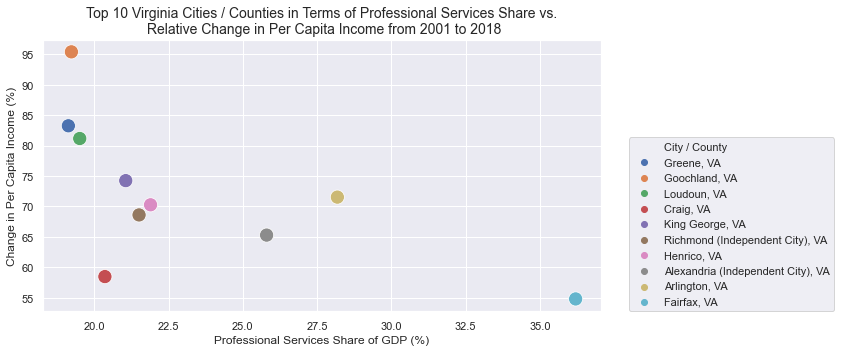

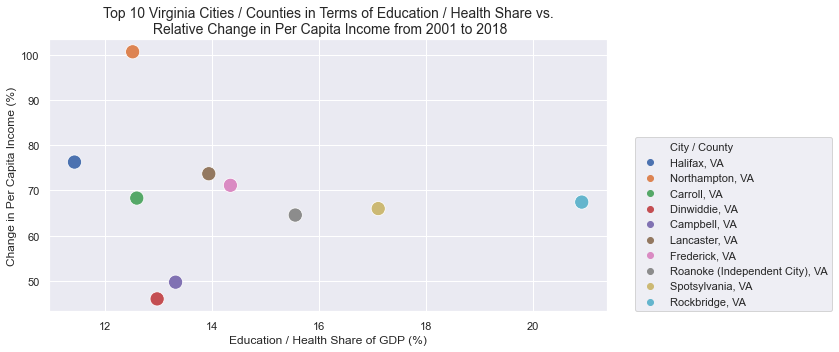

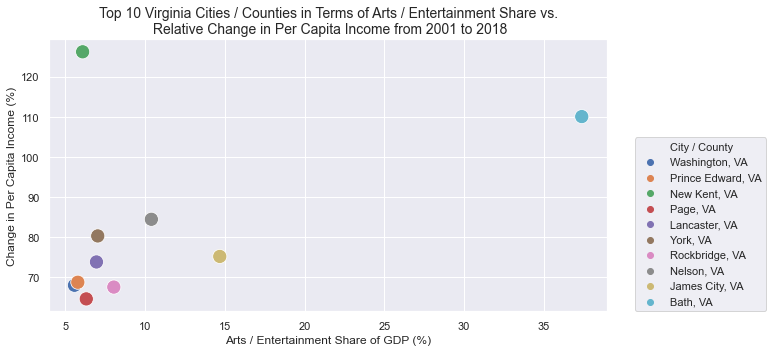

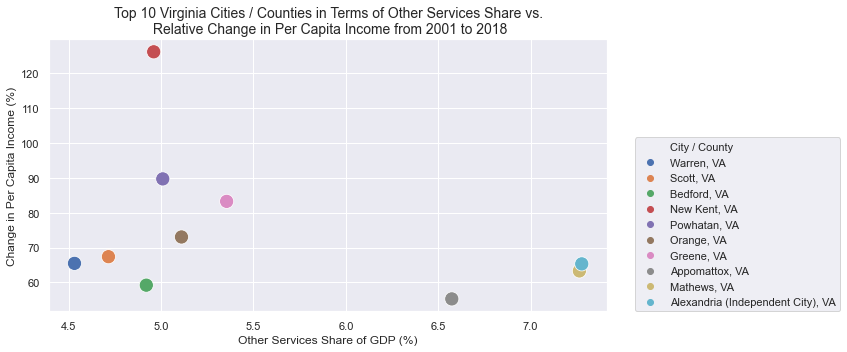

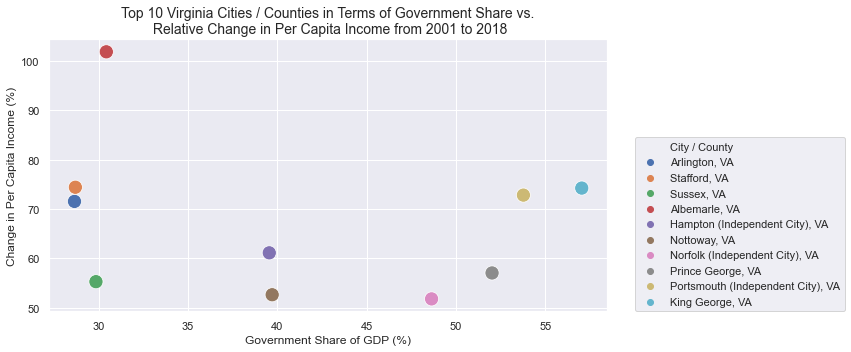

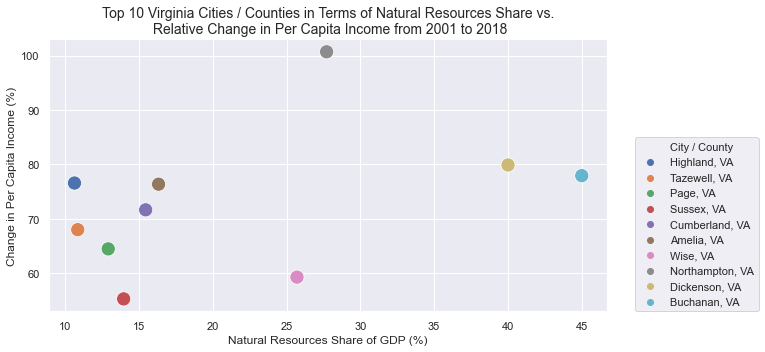

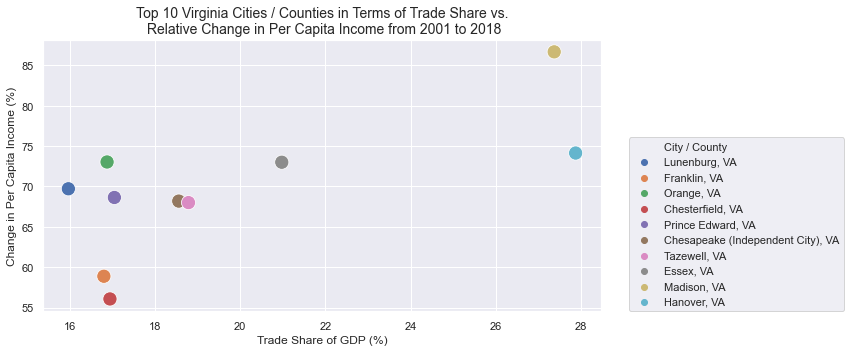

In [57]:
test4(top_utilities,'Utilities Share')
print()
test4(top_construct,'Construction Share')
print()
test4(top_manu,'Manufacturing Share')
print()
test4(top_transport,'Transportation Share')
print()
test4(top_info,'Information Share')
print()
test4(top_finance,'Finance Share')
print()
test4(top_prof,'Professional Services Share')
print()
test4(top_educ_health,'Education / Health Share')
print()
test4(top_arts,'Arts / Entertainment Share')
print()
test4(top_other,'Other Services Share')
print()
test4(top_govt,'Government Share')
print()
test4(top_natural,'Natural Resources Share')
print()
test4(top_trade,'Trade Share')

## 6E. Evaluating Trends in GDP by Industry: Comparing with Population

In [58]:
top_utilities = top_utilities.merge(pop_pct, on=['City / County'])
top_construct = top_construct.merge(pop_pct, on=['City / County'])
top_manu = top_manu.merge(pop_pct, on=['City / County'])
top_transport = top_transport.merge(pop_pct, on=['City / County'])
top_info = top_info.merge(pop_pct, on=['City / County'])
top_finance = top_finance.merge(pop_pct, on=['City / County'])
top_prof = top_prof.merge(pop_pct, on=['City / County'])
top_educ_health = top_educ_health.merge(pop_pct, on=['City / County'])
top_arts = top_arts.merge(pop_pct, on=['City / County'])
top_other = top_other.merge(pop_pct, on=['City / County'])
top_govt = top_govt.merge(pop_pct, on=['City / County'])
top_natural = top_natural.merge(pop_pct, on=['City / County'])
top_trade = top_trade.merge(pop_pct, on=['City / County'])

In [59]:
def test5(df, r):
    df = df
    e = sb.scatterplot(x=df.iloc[:,1], y=df.iloc[:,4], hue=df.index, s=200, data=df)
    r = str(r)
    plt.title('Top 10 Virginia Cities / Counties in Terms of '+r+
              ' vs.\n Relative Change in Population from 2001 to 2018', size=14)
    plt.xlabel(r+str(' of GDP (%)'))
    plt.ylabel('Change in Population (%)')
    plt.legend(loc=(1.05,0))
    plt.show()

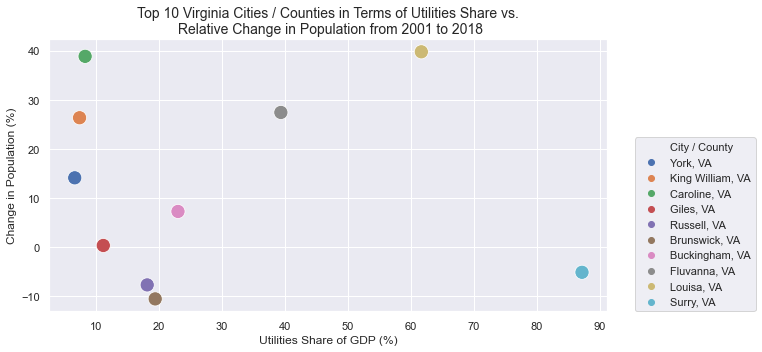

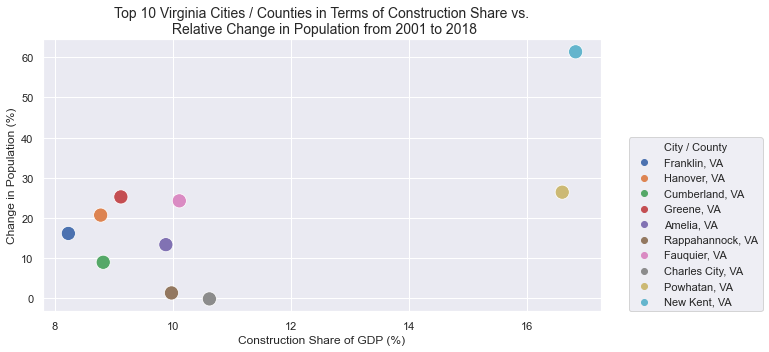

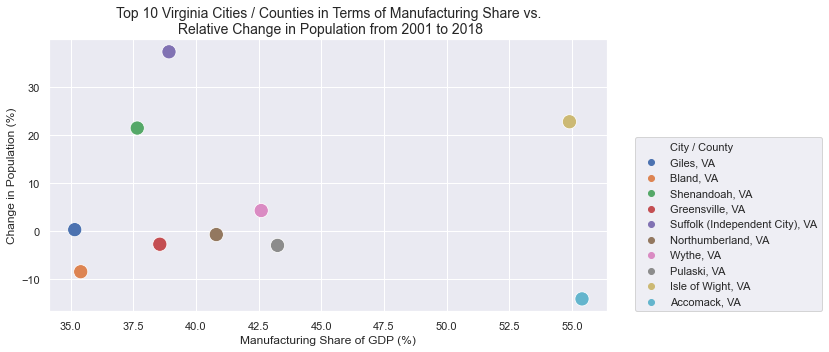

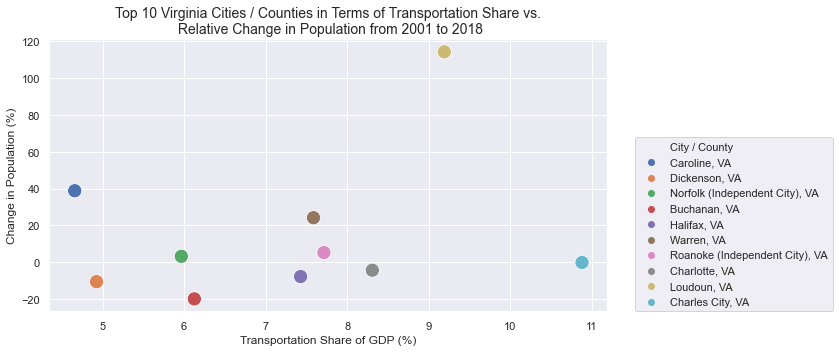

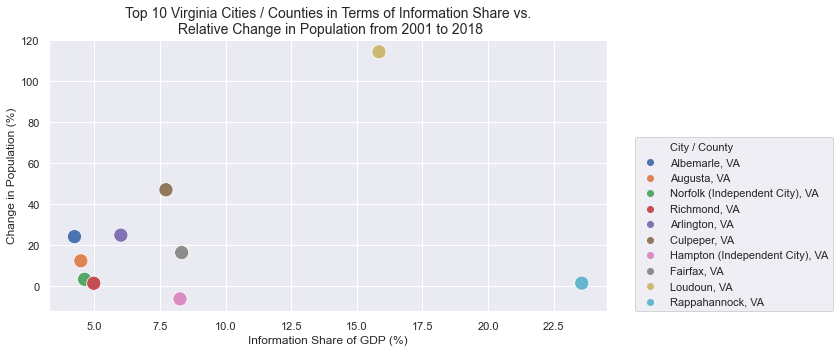

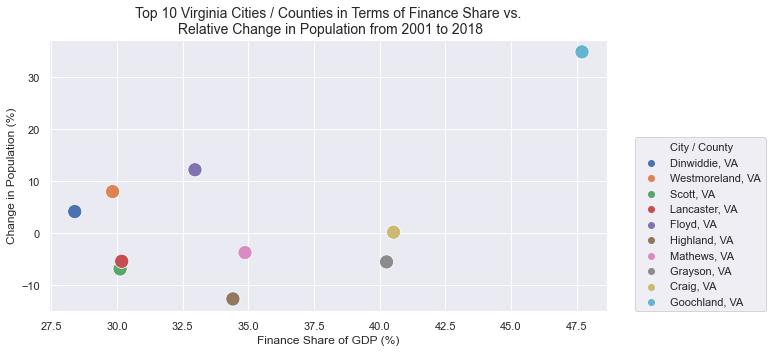

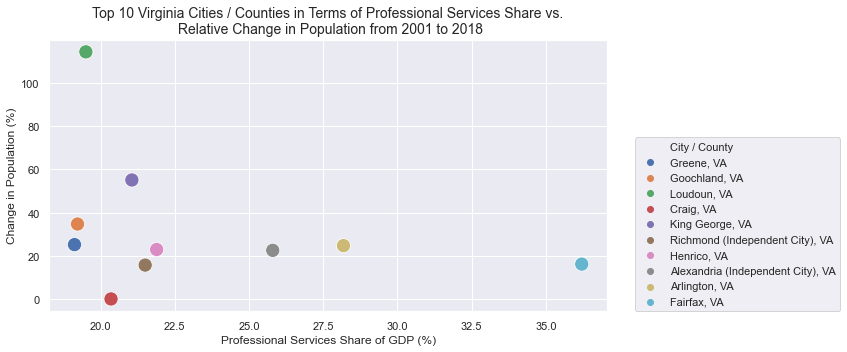

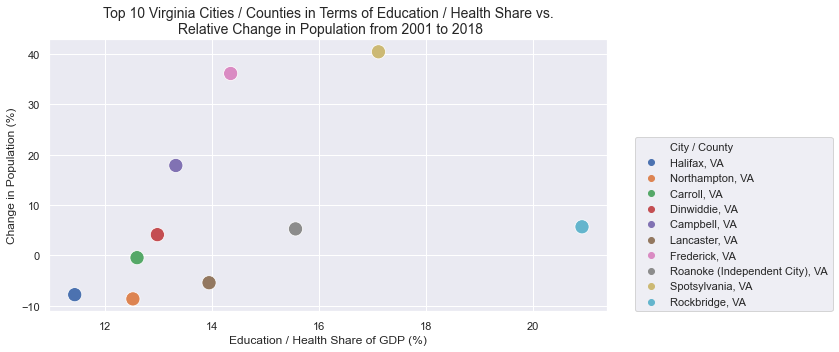

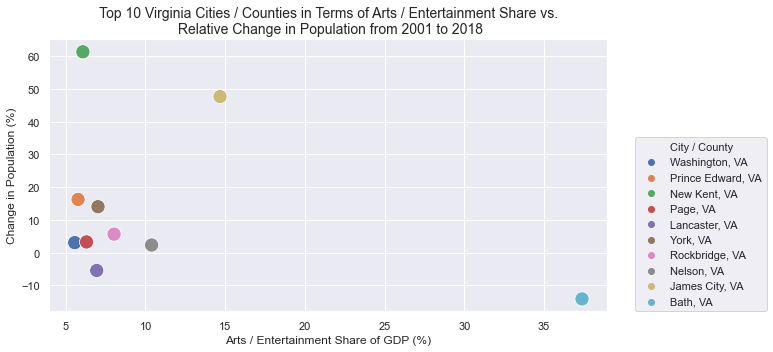

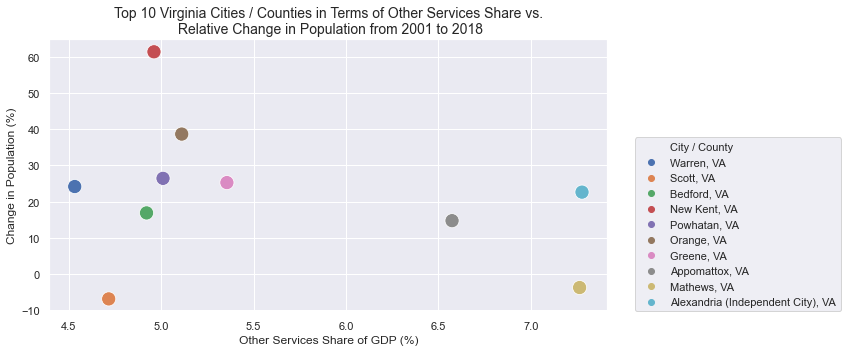

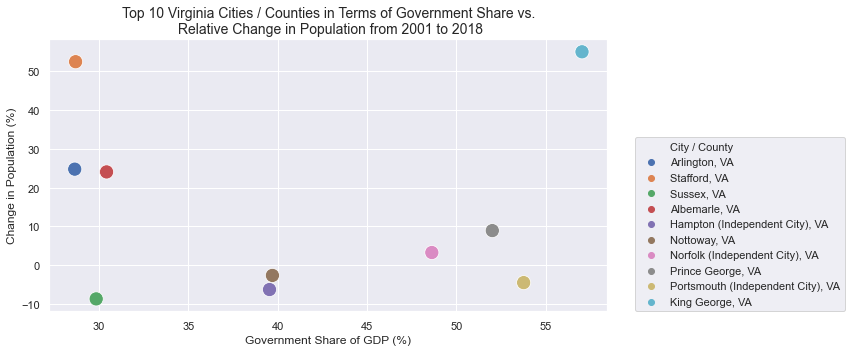

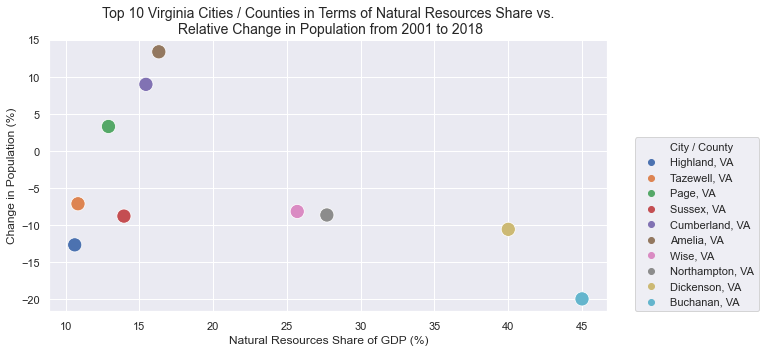

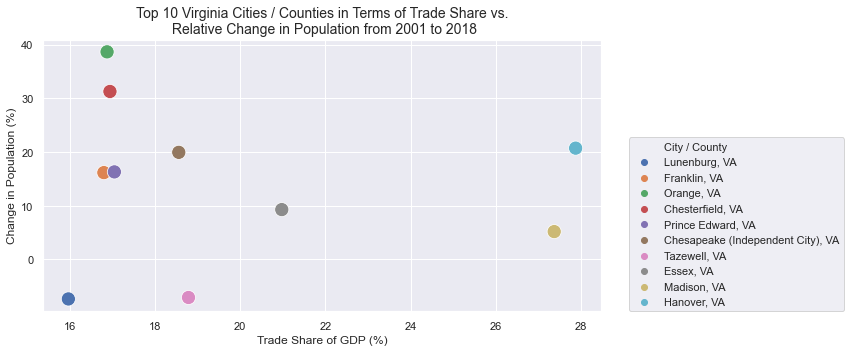

In [60]:
test5(top_utilities,'Utilities Share')
print()
test5(top_construct,'Construction Share')
print()
test5(top_manu,'Manufacturing Share')
print()
test5(top_transport,'Transportation Share')
print()
test5(top_info,'Information Share')
print()
test5(top_finance,'Finance Share')
print()
test5(top_prof,'Professional Services Share')
print()
test5(top_educ_health,'Education / Health Share')
print()
test5(top_arts,'Arts / Entertainment Share')
print()
test5(top_other,'Other Services Share')
print()
test5(top_govt,'Government Share')
print()
test5(top_natural,'Natural Resources Share')
print()
test5(top_trade,'Trade Share')

## 7. Predictions 

Based on the trends we have observed above, it is evident that the rate of growth between Virginia's counties and cities with respect to their income and population varies considerably.  This is especially the case when we compare these variables in relative terms to the top 10 areas by industry share of total GDP.  We can likewise make several predictions regarding future economic trends in Virginia.

At first glance, we can predict the areas located in the Northern Virginia region will continue to see more people move within their geographic limits.  When considering their trends, other areas further from Washington, DC, such as Spotsylvania and Stafford Counties, may also witness such shifts.  In addition, while accounting for the impact of globalization and interstate commerce, we can expect that the share of GDP toward industries such as information, finance, and professional services will continue to grow in counties and cities throughout the state.  The rate of such growth, however, may be slower in less urbanized counties and cities.  Given such shifts, personal income may rise as more jobs within these aforementioned industries develop.  However, we should also consider that, as a result of increased demand for these types of jobs, if the rate at which an area's population grows exceeds that of its personal income, then the relative change in per capita income may be muted at best.  In other words, it is possible for an area to augment its personal income significantly over the next couple of years, but not its per capita income if enough people move there within that time span.

## 8. Conclusions 

As can be seen, the role of geography in impacting the predominant economic sectors of Virginia's counties and cities from 2001 to 2018 should not be minimized.  For example, we can deduce that a plurality of Bath County's economy, which focused primarily on its arts and entertainment sector, may have been buoyed by its proximity to West Virginia and the Appalachian Mountains, making it a popular spot for tourism despite its relatively small population.  Similarly, further to the south of the state, Buchanan County's geography can likewise serve as an explanation as to why a greater share of its economy was based on natural resources, including operations related to mining and quarrying.

However, comparing an area's predominant industry with its total GDP does not sufficiently take into account relative changes in variables such as income, both personal and per capita, and population over time.  Furthermore, the size of the predominant sector's share does not necessarily imply a larger economy on the whole.  This can be seen when comparing Rockbridge and Campbell Counties.  While the former relied on education and health for more than 20% of its GDP from 2001 to 2018, higher than the rest of Virginia, its GDP overall was clearly dwarfed by the latter's figure of more than $100 billion over that time span.  One notable exception occurred in the professional services industry, in which the top 10 areas' share of that sector and their total GDPs exhibited a positive correlation.  Of course, we should also consider how some counties incorporated independent cities within their definitions, and thus may have experienced larger shifts for each of the variables we studied over the course of this project.  Examples of such areas include Fairfax and Prince William Counties.

From the data, it appears that a highly diversified economy is more prudent toward increasing personal and per capita income over time, as well as encouraging more people to move toward an area.  Specialization is instrumental in bringing a wider array of skills toward boosting growth, and potentially allowing collaboration between different industries.  It is an extension to the accelerating shift toward white-collar occupations throughout the economy today, at both the state and national level.  In addition, specialization may explain why some counties and cities reported higher total GDPs from 2001 to 2018 without necessarily allocating a significantly large share toward one industry, be it a plurality or majority.  As economic diversification in area accelerates, the rate of urbanization likewise grows, which in turn encourages more people to move and find work there.

Earlier in our project, we observed that the areas witnessing the greatest growth in personal and per capita income, as well as population, in absolute terms from 2001 to 2018 tended to be further up north.  This makes sense considering the rapidly expanding influence of the Washington, DC metropolitan area on the US economy.  Fairfax and Loudoun Counties especially reported considerable shifts in the aforementioned variables.  When observing these variables from a relative perspective though, the impact was more muted, particularly when considering how population growth can outpace that of personal and per capita income, even with significant economic expansion.  In relative terms, Loudoun County is an intriguing case since its population more than doubled from 2001 to 2018, and it outperformed other areas in its rate of growth in personal, but less so per capita, income.

This project was another terrific opportunity to apply the techniques of data mining toward extracting raw pieces from the Bureau of Economic Analysis with the help of Python.  As mentioned before, any references for this project are listed below.

## References 

Dollar Ticks. (n.d.). Retrieved October 16, 2020, from https://matplotlib.org/3.1.1/gallery/pyplots/dollar_ticks.html

Merge, join, concatenate and compare. (n.d.). Retrieved October 17, 2020, from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Pandas convert column to float. (n.d.). Retrieved October 12, 2020, from https://java2blog.com/pandas-convert-column-to-float/

Pandas.DataFrame.transpose. (n.d.). Retrieved October 17, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html

Pandas.Index.rename. (n.d.). Retrieved October 16, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.rename.html

Python Pandas : How to convert lists to a dataframe. (2018, September 25). Retrieved October 17, 2020, from https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

Regional Economic Accounts: Download. (2019, November 14). Retrieved October 12, 2020, from https://apps.bea.gov/regional/downloadzip.cfm

Replace invalid values with None in Pandas DataFrame. (2013, June 13). Retrieved October 16, 2020, from https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe

Renaming columns in pandas. (2012, July 5). Retrieved October 17, 2020, from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Select by partial string from a pandas DataFrame. (2012, July 5). Retrieved October 22, 2020, from https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe

Select rows containing certain values from pandas dataframe. (2016, July 4). Retrieved October 16, 2020, from https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe

Slicing multiple column ranges from a dataframe using iloc. (2017, August 31). Retrieved October 16, 2020, from https://stackoverflow.com/questions/45985877/slicing-multiple-column-ranges-from-a-dataframe-using-iloc